# Song-Recommendation-ML

Recommendation of a song for the listener nased on gender, age, region, artist they like and many more.

Let's connect our jupyter notebook to jovian.

# Problem Statement 

I selected the 15th data set from the resources tab in Jovian.
Link from where I downloaded the dataset: https://www.kaggle.com/c/MusicHackathon/data

This data has ratings given by the listeners, qualitative feedback, answers to the question on music and listeners demographics. We will use this dataset to get the rating of the test dataset.

It is a Regression type problem.

Installing the required libraries for making the model

In [7]:
!pip install plotly==5.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (14, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import os
import opendatasets as od
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

Downloading data set from Kaggle in the notebook

In [13]:
od.download('https://www.kaggle.com/c/MusicHackathon/data')

Skipping, found downloaded files in "./MusicHackathon" (use force=True to force download)


In [14]:
os.listdir('MusicHackathon')

['UserKey.csv',
 'global_mean_benchmark.csv',
 'words.csv',
 'tracks_mean_benchmark.csv',
 'sample.r',
 'artists_mean_benchmark.csv',
 'users_mean_benchmark.csv',
 'test.csv',
 'logo_greenplum_main.png',
 'users.csv',
 'train.csv']

Converting the dataset to dataframe

In [15]:
train_df = pd.read_csv('./MusicHackathon/train.csv')
test_df = pd.read_csv('./MusicHackathon/test.csv')
words_df = pd.read_csv('./MusicHackathon/words.csv', encoding = "ISO-8859-1")
users_df = pd.read_csv('./MusicHackathon/users.csv')

In [16]:
train_df

Artist  Track   User  Rating  Time
0           40    179  47994       9    17
1            9     23   8575      58     7
2           46    168  45475      13    16
3           11    153  39508      42    15
4           14     32  11565      54    19
...        ...    ...    ...     ...   ...
188685       0      3   1278      29     6
188686       1      6   2839      30    18
188687      10    142  35756      61    12
188688      22     54  20163      46    21
188689      47    171  45580      12     4

[188690 rows x 5 columns]

In [17]:
test_df

Artist  Track   User  Time
0            1      6   3475    18
1            6    149  39210    15
2           40    177  47861    17
3           31     79  27413    11
4           26     66  23232    22
...        ...    ...    ...   ...
125789      14     95  30004    23
125790      10     25   8186     7
125791      40    146  38180    13
125792      22    113  32918     0
125793       2     70  24231    22

[125794 rows x 4 columns]

In [18]:
words_df

Artist   User                                 HEARD_OF  \
0           47  45969                                 Heard of   
1           35  29118                           Never heard of   
2           14  31544                                 Heard of   
3           23  18085                           Never heard of   
4           23  18084                           Never heard of   
...        ...    ...                                      ...   
118296       4   3932      Heard of and listened to music EVER   
118297       4   3935      Heard of and listened to music EVER   
118298      12  11216  Heard of and listened to music RECENTLY   
118299      33  35142      Heard of and listened to music EVER   
118300       4   3915      Heard of and listened to music EVER   

                   OWN_ARTIST_MUSIC  LIKE_ARTIST  Uninspired  Sophisticated  \
0                               NaN          NaN         NaN            0.0   
1                               NaN          NaN         0.0            NaN   
2                               NaN          NaN         0.0            NaN   
3                               NaN          NaN         NaN            NaN   
4                               NaN          NaN         NaN            NaN   
...                             ...          ...         ...            ...   
118296  Own a little of their music         26.0         NaN            NaN   
118297  Own a little of their music         30.0         NaN            NaN   
118298      Own none of their music         71.0         NaN            NaN   
118299      Own none of their music         31.0         NaN            NaN   
118300  Own a little of their music         46.0         NaN            NaN   

        Aggressive  Edgy  Sociable  Laid back  Wholesome  Uplifting  \
0              NaN     0       0.0        0.0        NaN        0.0   
1              0.0     0       NaN        NaN        NaN        NaN   
2              0.0     0       NaN        NaN        NaN        NaN   
3              0.0     0       NaN        NaN        NaN        NaN   
4              0.0     0       NaN        NaN        NaN        NaN   
...            ...   ...       ...        ...        ...        ...   
118296         0.0     0       NaN        NaN        NaN        NaN   
118297         0.0     0       NaN        NaN        NaN        NaN   
118298         0.0     0       NaN        NaN        NaN        NaN   
118299         0.0     0       NaN        NaN        NaN        NaN   
118300         0.0     0       NaN        NaN        NaN        NaN   

        Intriguing  Legendary  Free  Thoughtful  Outspoken  Serious  \
0              0.0        NaN   0.0           0        0.0      NaN   
1              NaN        NaN   NaN           0        NaN      0.0   
2              NaN        NaN   NaN           1        NaN      0.0   
3              NaN        NaN   NaN           0        NaN      0.0   
4              NaN        NaN   NaN           0        NaN      0.0   
...            ...        ...   ...         ...        ...      ...   
118296         NaN        NaN   NaN           0        NaN      0.0   
118297         NaN        NaN   NaN           0        NaN      0.0   
118298         NaN        NaN   NaN           0        NaN      0.0   
118299         NaN        NaN   NaN           0        NaN      0.0   
118300         NaN        NaN   NaN           0        NaN      0.0   

        Good lyrics  Unattractive  Confident  Old  Youthful  Boring  Current  \
0               NaN           NaN        NaN  NaN       0.0     1.0        0   
1               0.0           0.0        0.0  NaN       0.0     0.0        0   
2               0.0           0.0        0.0  NaN       0.0     0.0        0   
3               0.0           0.0        0.0  NaN       0.0     1.0        0   
4               0.0           0.0        0.0  NaN       0.0     0.0        0   
...             ...           ...        ...  ...       ...     ...      ...   


In [19]:
users_df

RESPID  GENDER   AGE                             WORKING    REGION  \
0       36927  Female  60.0                               Other     South   
1        3566  Female  36.0  Full-time housewife / househusband     South   
2       20054  Female  52.0           Employed 30+ hours a week  Midlands   
3       41749  Female  40.0        Employed 8-29 hours per week     South   
4       23108  Female  16.0                   Full-time student     North   
...       ...     ...   ...                                 ...       ...   
48640   19361    Male  48.0                       Self-employed  Midlands   
48641   17639  Female  60.0  Full-time housewife / househusband  Midlands   
48642   28753  Female  25.0           Employed 30+ hours a week  Midlands   
48643   26197    Male  44.0           Employed 30+ hours a week  Midlands   
48644   16225  Female  43.0                                 NaN     North   

                                                   MUSIC           LIST_OWN  \
0      Music is important to me but not necessarily m...             1 hour   
1      Music is important to me but not necessarily m...             1 hour   
2      I like music but it does not feature heavily i...             1 hour   
3       Music means a lot to me and is a passion of mine            2 hours   
4       Music means a lot to me and is a passion of mine            3 hours   
...                                                  ...                ...   
48640  I like music but it does not feature heavily i...  Less than an hour   
48641   Music means a lot to me and is a passion of mine            2 hours   
48642   Music means a lot to me and is a passion of mine            2 hours   
48643   Music means a lot to me and is a passion of mine            2 hours   
48644  I like music but it does not feature heavily i...                NaN   

               LIST_BACK    Q1    Q2    Q3    Q4    Q5    Q6     Q7    Q8  \
0                    NaN  49.0  50.0  49.0  50.0  32.0  33.0   32.0   0.0   
1                 1 hour  55.0  55.0  62.0   9.0   9.0   9.0   10.0  11.0   
2      Less than an hour  11.0  50.0   9.0   8.0  45.0  10.0   30.0  29.0   
3                3 hours  81.0  80.0  88.0  88.0  31.0  31.0   51.0  30.0   
4                6 hours  76.0  79.0  78.0  73.0  71.0  68.0   73.0  67.0   
...                  ...   ...   ...   ...   ...   ...   ...    ...   ...   
48640            2 hours   9.0  73.0  33.0   6.0  10.0  68.0   51.0  52.0   
48641             1 hour  26.0  50.0  49.0  58.0  59.0  48.0    6.0   5.0   
48642            6 hours  89.0  89.0  89.0   6.0   6.0  51.0   26.0   5.0   
48643            4 hours  95.0  97.0  97.0  98.0  97.0  99.0  100.0  99.0   
48644                  2  49.0  48.0  50.0  51.0  49.0  25.0   45.0  51.0   

          Q9   Q10   Q11   Q12   Q13   Q14   Q15   Q16    Q17   Q18   Q19  
0       74.0  50.0  50.0  71.0  52.0  71.0   9.0   7.0   72.0  49.0  26.0  
1       55.0  12.0  65.0  65.0  80.0  79.0  51.0  31.0   68.0  54.0  33.0  
2        8.0  50.0  94.0  51.0  74.0  66.0  27.0  46.0   73.0   8.0  31.0  
3        8.0  76.0  74.0  64.0  73.0  85.0  61.0  77.0   76.0  78.0  88.0  
4       31.0  56.0  13.0  82.0  79.0  68.0  71.0   NaN   86.0  80.0  32.0  
...      ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   ...  
48640   93.0  53.0  74.0  36.0  13.0  38.0  12.0  10.0   50.0  10.0  28.0  
48641   88.0  58.0  62.0  79.0  17.0  24.0  30.0   6.0   73.0  20.0  21.0  
48642    0.0  70.0  70.0  70.0  51.0  70.0  70.0   NaN  100.0  70.0  69.0  
48643  100.0  97.0  98.0  99.0  97.0  99.0  99.0  99.0  100.0  91.0  96.0  
48644   40.0  10.0  69.0  70.0  53.0  54.0  10.0   4.0    7.0   NaN   NaN  

[48645 rows x 27 columns]

In [20]:
words_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118301 entries, 0 to 118300
Data columns (total 88 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            118301 non-null  int64  
 1   User              118301 non-null  int64  
 2   HEARD_OF          118277 non-null  object 
 3   OWN_ARTIST_MUSIC  33507 non-null   object 
 4   LIKE_ARTIST       33308 non-null   float64
 5   Uninspired        26154 non-null   float64
 6   Sophisticated     20724 non-null   float64
 7   Aggressive        97577 non-null   float64
 8   Edgy              118301 non-null  int64  
 9   Sociable          20724 non-null   float64
 10  Laid back         20724 non-null   float64
 11  Wholesome         1040 non-null    float64
 12  Uplifting         20724 non-null   float64
 13  Intriguing        20724 non-null   float64
 14  Legendary         1040 non-null    float64
 15  Free              20724 non-null   float64
 16  Thoughtful        11

# Score to words DF

Now i will be giving score to 'words_df' by preprocessing the df.

The score system works like this:

* For each value 1 in the positive columns, we **add 1 point to the total score**
* For each value 1 in the negative columns, we **subtract 1 point to the total score**
* Any 0 and NaN value we **ignore as they are neutral**

In [21]:
positive_score = ['Sophisticated', 'Sociable', 'Laid back', 'Wholesome', 'Uplifting', 'Intriguing', 'Legendary', 'Free', 'Outspoken', 'Good lyrics', 'Confident', 'Youthful', 'Current', 'Colourful', 'Stylish', 'Heartfelt', 'Pioneer', 'Outgoing', 'Inspiring', 'Beautiful', 'Fun', 'Authentic', 'Credible', 'Way out', 'Cool', 'Catchy', 'Sensitive', 'Passionate', 'Good Lyrics', 'Timeless', 'Original', 'Talented', 'Distinctive', 'Approachable', 'Genius', 'Trendsetter', 'Upbeat', 'Relatable', 'Energetic', 'Exciting', 'Emotional', 'Nostalgic', 'Progressive', 'Sexy', 'Over', 'Popular', 'Superstar', 'Relaxed', 'Iconic', 'Classic', 'Playful', 'Warm', 'Soulful']

In [22]:
negative_score = ['Uninspired', 'Unattractive', 'Boring', 'Cheap', 'Irrelevant', 'Superficial', 'Annoying', 'Not authentic', 'Depressing', 'Noisy', 'Fake', 'Cheesy', 'Intrusive', 'Unoriginal', 'Dated', 'Unapproachable']

In [23]:
words_df['plus_score'] = words_df[positive_score].sum(axis=1)
words_df['minus_score'] = words_df[negative_score].sum(axis=1)
words_df['words_score'] = words_df['plus_score'] - words_df['minus_score']

In [24]:
words_df[words_df.LIKE_ARTIST > 90].sample(15)

Artist   User                                 HEARD_OF  \
60464       17  16057  Heard of and listened to music RECENTLY   
28019       11  10490  Heard of and listened to music RECENTLY   
35818       22  33094                      Ever heard music by   
26503        4   4676  Heard of and listened to music RECENTLY   
117772       4  37422  Heard of and listened to music RECENTLY   
98274       22  32848                     Listened to recently   
36745       25  21171  Heard of and listened to music RECENTLY   
79109        6   7411  Heard of and listened to music RECENTLY   
28076        4   4552  Heard of and listened to music RECENTLY   
107060      10   9622  Heard of and listened to music RECENTLY   
30043       40  38282  Heard of and listened to music RECENTLY   
10944        7   8194  Heard of and listened to music RECENTLY   
82237       17  16183  Heard of and listened to music RECENTLY   
48876       45  43649  Heard of and listened to music RECENTLY   
2972        40  50900  Heard of and listened to music RECENTLY   

                      OWN_ARTIST_MUSIC  LIKE_ARTIST  Uninspired  \
60464      Own a little of their music         92.0         NaN   
28019         Own a lot of their music         92.0         NaN   
35818         Own a lot of their music         92.0         NaN   
26503   Own all or most of their music         97.0         NaN   
117772        Own a lot of their music         91.0         NaN   
98274   Own all or most of their music         93.0         NaN   
36745         Own a lot of their music         98.0         NaN   
79109   Own all or most of their music         91.0         NaN   
28076   Own all or most of their music         93.0         NaN   
107060        Own a lot of their music        100.0         NaN   
30043   Own all or most of their music        100.0         NaN   
10944         Own a lot of their music        100.0         NaN   
82237         Own a lot of their music         96.0         NaN   
48876      Own a little of their music        100.0         NaN   
2972          Own a lot of their music         91.0         NaN   

        Sophisticated  Aggressive  Edgy  Sociable  Laid back  Wholesome  \
60464             0.0         NaN     0       0.0        0.0        NaN   
28019             0.0         NaN     0       0.0        0.0        NaN   
35818             0.0         NaN     0       0.0        0.0        0.0   
26503             NaN         0.0     0       NaN        NaN        NaN   
117772            NaN         0.0     0       NaN        NaN        NaN   
98274             0.0         NaN     0       0.0        0.0        0.0   
36745             NaN         0.0     1       NaN        NaN        NaN   
79109             0.0         NaN     1       0.0        0.0        NaN   
28076             NaN         0.0     1       NaN        NaN        NaN   
107060            0.0         NaN     1       0.0        0.0        NaN   
30043             NaN         0.0     0       NaN        NaN        NaN   
10944             0.0         NaN     1       0.0        0.0        NaN   
82237             0.0         NaN     0       0.0        0.0        NaN   
48876             NaN         0.0     0       NaN        NaN        NaN   
2972              NaN         0.0     0       NaN        NaN        NaN   

        Uplifting  Intriguing  Legendary  Free  Thoughtful  Outspoken  \
60464         0.0         0.0        NaN   1.0           0        0.0   
28019         1.0         1.0        NaN   1.0           0        0.0   
35818         0.0         0.0        1.0   1.0           0        0.0   
26503         NaN         NaN        NaN   NaN           0        NaN   
117772        NaN         NaN        NaN   NaN           0        NaN   
98274         0.0         0.0        1.0   0.0           0        0.0   
36745         NaN         NaN        NaN   NaN           0        NaN   
79109         0.0         0.0        NaN   1.0           0        0.0   
28076         NaN   

As now we gave the word score we don't need the words columns in the words_df dataframe.
Now we will create a dateframe where the columns will be the **word score of above 90**

In [25]:
words_red_df = words_df[['Artist', 'User', 'HEARD_OF', 'OWN_ARTIST_MUSIC', 'LIKE_ARTIST', 'words_score']]

In [26]:
words_red_df

Artist   User                                 HEARD_OF  \
0           47  45969                                 Heard of   
1           35  29118                           Never heard of   
2           14  31544                                 Heard of   
3           23  18085                           Never heard of   
4           23  18084                           Never heard of   
...        ...    ...                                      ...   
118296       4   3932      Heard of and listened to music EVER   
118297       4   3935      Heard of and listened to music EVER   
118298      12  11216  Heard of and listened to music RECENTLY   
118299      33  35142      Heard of and listened to music EVER   
118300       4   3915      Heard of and listened to music EVER   

                   OWN_ARTIST_MUSIC  LIKE_ARTIST  words_score  
0                               NaN          NaN         -1.0  
1                               NaN          NaN          3.0  
2                               NaN          NaN          2.0  
3                               NaN          NaN         -1.0  
4                               NaN          NaN          0.0  
...                             ...          ...          ...  
118296  Own a little of their music         26.0         -1.0  
118297  Own a little of their music         30.0          1.0  
118298      Own none of their music         71.0          6.0  
118299      Own none of their music         31.0          3.0  
118300  Own a little of their music         46.0          4.0  

[118301 rows x 6 columns]

In [27]:
words_red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118301 entries, 0 to 118300
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            118301 non-null  int64  
 1   User              118301 non-null  int64  
 2   HEARD_OF          118277 non-null  object 
 3   OWN_ARTIST_MUSIC  33507 non-null   object 
 4   LIKE_ARTIST       33308 non-null   float64
 5   words_score       118301 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 5.4+ MB


# Merging

Now we will merge words_red_df & users_df into training_merge_df dataframe

In [28]:
users_df.rename(columns={'RESPID': 'User'}, inplace=True)

In [29]:
training_merge_df = train_df.merge(words_red_df, how='left', on=['Artist', 'User'])

In [30]:
users_df

User  GENDER   AGE                             WORKING    REGION  \
0      36927  Female  60.0                               Other     South   
1       3566  Female  36.0  Full-time housewife / househusband     South   
2      20054  Female  52.0           Employed 30+ hours a week  Midlands   
3      41749  Female  40.0        Employed 8-29 hours per week     South   
4      23108  Female  16.0                   Full-time student     North   
...      ...     ...   ...                                 ...       ...   
48640  19361    Male  48.0                       Self-employed  Midlands   
48641  17639  Female  60.0  Full-time housewife / househusband  Midlands   
48642  28753  Female  25.0           Employed 30+ hours a week  Midlands   
48643  26197    Male  44.0           Employed 30+ hours a week  Midlands   
48644  16225  Female  43.0                                 NaN     North   

                                                   MUSIC           LIST_OWN  \
0      Music is important to me but not necessarily m...             1 hour   
1      Music is important to me but not necessarily m...             1 hour   
2      I like music but it does not feature heavily i...             1 hour   
3       Music means a lot to me and is a passion of mine            2 hours   
4       Music means a lot to me and is a passion of mine            3 hours   
...                                                  ...                ...   
48640  I like music but it does not feature heavily i...  Less than an hour   
48641   Music means a lot to me and is a passion of mine            2 hours   
48642   Music means a lot to me and is a passion of mine            2 hours   
48643   Music means a lot to me and is a passion of mine            2 hours   
48644  I like music but it does not feature heavily i...                NaN   

               LIST_BACK    Q1    Q2    Q3    Q4    Q5    Q6     Q7    Q8  \
0                    NaN  49.0  50.0  49.0  50.0  32.0  33.0   32.0   0.0   
1                 1 hour  55.0  55.0  62.0   9.0   9.0   9.0   10.0  11.0   
2      Less than an hour  11.0  50.0   9.0   8.0  45.0  10.0   30.0  29.0   
3                3 hours  81.0  80.0  88.0  88.0  31.0  31.0   51.0  30.0   
4                6 hours  76.0  79.0  78.0  73.0  71.0  68.0   73.0  67.0   
...                  ...   ...   ...   ...   ...   ...   ...    ...   ...   
48640            2 hours   9.0  73.0  33.0   6.0  10.0  68.0   51.0  52.0   
48641             1 hour  26.0  50.0  49.0  58.0  59.0  48.0    6.0   5.0   
48642            6 hours  89.0  89.0  89.0   6.0   6.0  51.0   26.0   5.0   
48643            4 hours  95.0  97.0  97.0  98.0  97.0  99.0  100.0  99.0   
48644                  2  49.0  48.0  50.0  51.0  49.0  25.0   45.0  51.0   

          Q9   Q10   Q11   Q12   Q13   Q14   Q15   Q16    Q17   Q18   Q19  
0       74.0  50.0  50.0  71.0  52.0  71.0   9.0   7.0   72.0  49.0  26.0  
1       55.0  12.0  65.0  65.0  80.0  79.0  51.0  31.0   68.0  54.0  33.0  
2        8.0  50.0  94.0  51.0  74.0  66.0  27.0  46.0   73.0   8.0  31.0  
3        8.0  76.0  74.0  64.0  73.0  85.0  61.0  77.0   76.0  78.0  88.0  
4       31.0  56.0  13.0  82.0  79.0  68.0  71.0   NaN   86.0  80.0  32.0  
...      ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   ...  
48640   93.0  53.0  74.0  36.0  13.0  38.0  12.0  10.0   50.0  10.0  28.0  
48641   88.0  58.0  62.0  79.0  17.0  24.0  30.0   6.0   73.0  20.0  21.0  
48642    0.0  70.0  70.0  70.0  51.0  70.0  70.0   NaN  100.0  70.0  69.0  
48643  100.0  97.0  98.0  99.0  97.0  99.0  99.0  99.0  100.0  91.0  96.0  
48644   40.0  10.0  69.0  70.0  53.0  54.0  10.0   4.0    7.0   NaN   NaN  

[48645 rows x 27 columns]

In [31]:
training_merge_df

Artist  Track   User  Rating  Time  \
0           40    179  47994       9    17   
1            9     23   8575      58     7   
2           46    168  45475      13    16   
3           11    153  39508      42    15   
4           14     32  11565      54    19   
...        ...    ...    ...     ...   ...   
188685       0      3   1278      29     6   
188686       1      6   2839      30    18   
188687      10    142  35756      61    12   
188688      22     54  20163      46    21   
188689      47    171  45580      12     4   

                                       HEARD_OF          OWN_ARTIST_MUSIC  \
0                                Never heard of                       NaN   
1                                Never heard of                       NaN   
2                                Never heard of                       NaN   
3           Heard of and listened to music EVER   Own none of their music   
4           Heard of and listened to music EVER   Own none of their music   
...                                         ...                       ...   
188685                           Never heard of                       NaN   
188686                                 Heard of                       NaN   
188687                                 Heard of                       NaN   
188688  Heard of and listened to music RECENTLY  Own a lot of their music   
188689  Heard of and listened to music RECENTLY   Own none of their music   

        LIKE_ARTIST  words_score  
0               NaN         -2.0  
1               NaN          5.0  
2               NaN          1.0  
3              28.0          4.0  
4              18.0          2.0  
...             ...          ...  
188685          NaN          3.0  
188686          NaN         -1.0  
188687          NaN          3.0  
188688         74.0         10.0  
188689          7.0          1.0  

[188690 rows x 9 columns]

In [32]:
training_merge_df = training_merge_df.merge(users_df, how='left', on=['User'])

In [33]:
training_merge_df

Artist  Track   User  Rating  Time  \
0           40    179  47994       9    17   
1            9     23   8575      58     7   
2           46    168  45475      13    16   
3           11    153  39508      42    15   
4           14     32  11565      54    19   
...        ...    ...    ...     ...   ...   
188685       0      3   1278      29     6   
188686       1      6   2839      30    18   
188687      10    142  35756      61    12   
188688      22     54  20163      46    21   
188689      47    171  45580      12     4   

                                       HEARD_OF          OWN_ARTIST_MUSIC  \
0                                Never heard of                       NaN   
1                                Never heard of                       NaN   
2                                Never heard of                       NaN   
3           Heard of and listened to music EVER   Own none of their music   
4           Heard of and listened to music EVER   Own none of their music   
...                                         ...                       ...   
188685                           Never heard of                       NaN   
188686                                 Heard of                       NaN   
188687                                 Heard of                       NaN   
188688  Heard of and listened to music RECENTLY  Own a lot of their music   
188689  Heard of and listened to music RECENTLY   Own none of their music   

        LIKE_ARTIST  words_score  GENDER   AGE  \
0               NaN         -2.0  Female  41.0   
1               NaN          5.0  Female  45.0   
2               NaN          1.0    Male  23.0   
3              28.0          4.0  Female  61.0   
4              18.0          2.0  Female  20.0   
...             ...          ...     ...   ...   
188685          NaN          3.0  Female  53.0   
188686          NaN         -1.0    Male  52.0   
188687          NaN          3.0  Female  28.0   
188688         74.0         10.0  Female  35.0   
188689          7.0          1.0  Female  82.0   

                                   WORKING    REGION  \
0                   Temporarily unemployed     North   
1                                      NaN    Centre   
2             Employed 8-29 hours per week  Midlands   
3             Retired from self-employment  Midlands   
4                   Temporarily unemployed     South   
...                                    ...       ...   
188685                                 NaN     North   
188686           Employed 30+ hours a week  Midlands   
188687  Full-time housewife / househusband     North   
188688           Employed 30+ hours a week     North   
188689                                 NaN    Centre   

                                                    MUSIC           LIST_OWN  \
0        Music means a lot to me and is a passion of mine            3 hours   
1       Music is important to me but not necessarily m...                  1   
2        Music means a lot to me and is a passion of mine            5 hours   
3       Music is important to me but not necessarily m...             1 hour   
4       Music is important to me but not necessarily m...  Less than an hour   
...                                                   ...                ...   
188685  Music is important to me but not necessarily m...                  1   
188686  I like music but it does not feature heavily i...             1 hour   
188687  Music is important to me but not necessarily m...                NaN   
188688  Music is important to me but not necessarily m...             1 hour   
188689  Music is important to me but not necessarily m...                  0   

       LIST_BACK     Q1    Q2    Q3    Q4    Q5    Q6    Q7    Q8    Q9   Q10  \
0        0 Hours   62.0  22.0  62.0  48.0  35.0  30.0  48.0  28.0  88.0  70.0   
1              2   32.0  57.0  52.0  10.0  10.0  29.0  73.0  51.0  12.0  50.0   
2            NaN  100.0  75.0  90.0  48.0  25.0  34.

In [34]:
training_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188690 entries, 0 to 188689
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            188690 non-null  int64  
 1   Track             188690 non-null  int64  
 2   User              188690 non-null  int64  
 3   Rating            188690 non-null  int64  
 4   Time              188690 non-null  int64  
 5   HEARD_OF          186418 non-null  object 
 6   OWN_ARTIST_MUSIC  56835 non-null   object 
 7   LIKE_ARTIST       55028 non-null   float64
 8   words_score       186636 non-null  float64
 9   GENDER            176833 non-null  object 
 10  AGE               174982 non-null  float64
 11  WORKING           140545 non-null  object 
 12  REGION            167481 non-null  object 
 13  MUSIC             176833 non-null  object 
 14  LIST_OWN          158651 non-null  object 
 15  LIST_BACK         158790 non-null  object 
 16  Q1                17

In [35]:
training_merge_df.sample(15)

Artist  Track   User  Rating  Time  \
178895      41    156  41651      10    16   
78361       27     71  24925       9    22   
77210       40    176  47853      69    17   
6479         1      6   2477      51    18   
10258       45    163  44623      31    16   
50380        6    148  40030      31    15   
173191      20     44  17381      35    21   
154322      45    164  44301      49    16   
52731       30     76  23130      51    22   
41822       20     45  17939      29    21   
184363      22    113  33201       0     0   
6065        26     62  24135      27    22   
61170       39    103  31023      48    23   
129530      48    172  48266      26    17   
146189      26     67  23249      24    22   

                                       HEARD_OF             OWN_ARTIST_MUSIC  \
178895                                 Heard of                          NaN   
78361                            Never heard of                          NaN   
77210   Heard of and listened to music RECENTLY     Own a lot of their music   
6479                                   Heard of                          NaN   
10258                                  Heard of                          NaN   
50380                                       NaN                          NaN   
173191  Heard of and listened to music RECENTLY  Own a little of their music   
154322      Heard of and listened to music EVER  Own a little of their music   
52731       Heard of and listened to music EVER  Own a little of their music   
41822                            Never heard of                          NaN   
184363                      Ever heard music by      Own none of their music   
6065                                   Heard of                          NaN   
61170                                  Heard of                          NaN   
129530                           Never heard of                          NaN   
146189                           Never heard of                          NaN   

        LIKE_ARTIST  words_score  GENDER   AGE  \
178895          NaN         -2.0  Female  62.0   
78361           NaN          0.0     NaN   NaN   
77210          70.0          7.0  Female  47.0   
6479            NaN          0.0  Female  21.0   
10258           NaN          3.0  Female  54.0   
50380           NaN          NaN  Female  34.0   
173191         40.0          2.0    Male  34.0   
154322         49.0          5.0  Female  28.0   
52731          54.0          5.0    Male  20.0   
41822           NaN         -1.0  Female  19.0   
184363         23.0          0.0    Male  32.0   
6065            NaN          8.0  Female  38.0   
61170           NaN          4.0  Female  61.0   
129530          NaN          2.0  Female  41.0   
146189          NaN         -1.0  Female  22.0   

                                           WORKING            REGION  \
178895  In unpaid employment (e.g. voluntary work)             North   
78361                                          NaN               NaN   
77210                                        Other  Northern Ireland   
6479                             Part-time student             South   
10258                    Employed 30+ hours a week             North   
50380                    Employed 30+ hours a week             North   
173191                               Self-employed          Midlands   
154322                Employed 8-29 hours per week             South   
52731                 Employed 8-29 hours per week             North   
41822                            Full-time student             North   
184363                                         NaN               NaN   
6065                  Employed 8-29 hours per week          Midlands   
61170                    Employed 30+ hours a week          Midlands   
129530                   Employed 30+ hours a week             North   
146189                      Temporarily unemployed  Northern Ireland   

                                    

Merging the test dataset

In [36]:
test_merge_df = test_df.merge(words_red_df, how='left', on=['Artist', 'User'])
test_merge_df = test_merge_df.merge(users_df, how='left', on=['User'])

In [37]:
test_merge_df

Artist  Track   User  Time                             HEARD_OF  \
0            1      6   3475    18  Heard of and listened to music EVER   
1            6    149  39210    15                                  NaN   
2           40    177  47861    17                       Never heard of   
3           31     79  27413    11                       Never heard of   
4           26     66  23232    22                       Never heard of   
...        ...    ...    ...   ...                                  ...   
125789      14     95  30004    23                             Heard of   
125790      10     25   8186     7                       Never heard of   
125791      40    146  38180    13                             Heard of   
125792      22    113  32918     0                  Ever heard music by   
125793       2     70  24231    22                       Never heard of   

               OWN_ARTIST_MUSIC  LIKE_ARTIST  words_score  GENDER   AGE  \
0       Own none of their music          3.0          2.0  Female  48.0   
1                           NaN          NaN          NaN    Male  28.0   
2                           NaN          NaN         -2.0  Female  59.0   
3                           NaN          NaN          0.0  Female  25.0   
4                           NaN          NaN          0.0     NaN   NaN   
...                         ...          ...          ...     ...   ...   
125789                      NaN          NaN         12.0    Male  36.0   
125790                      NaN          NaN          6.0    Male  49.0   
125791                      NaN          NaN          3.0  Female  40.0   
125792  Own none of their music         48.0          2.0  Female  48.0   
125793                      NaN          NaN          4.0    Male  43.0   

                                              WORKING    REGION  \
0                           Employed 30+ hours a week     South   
1                           Employed 30+ hours a week  Midlands   
2                                               Other  Midlands   
3       Employed part-time less than 8 hours per week  Midlands   
4                                                 NaN       NaN   
...                                               ...       ...   
125789                      Employed 30+ hours a week  Midlands   
125790                                            NaN     North   
125791             Full-time housewife / househusband  Midlands   
125792                                            NaN       NaN   
125793                      Employed 30+ hours a week     North   

                                                    MUSIC           LIST_OWN  \
0        Music means a lot to me and is a passion of mine             1 hour   
1       Music is important to me but not necessarily m...             1 hour   
2       Music is no longer as important as it used to ...  Less than an hour   
3       I like music but it does not feature heavily i...             1 hour   
4                                                     NaN                NaN   
...                                                   ...                ...   
125789   Music means a lot to me and is a passion of mine           10 hours   
125790  I like music but it does not feature heavily i...                NaN   
125791   Music means a lot to me and is a passion of mine           15 hours   
125792   Music means a lot to me and is a passion of mine                  0   
125793  Music is important to me but not necessarily m...             1 hour   

                LIST_BACK    Q1    Q2     Q3    Q4    Q5    Q6    Q7    Q8  \
0                 3 hours   8.0  69.0   27.0  27.0  50.0  27.0  26.0   8.0   
1                  1 hour  81.0  67.0   94.0  61.0  53.0  32.0  41.0  42.0   
2       Less than an hour   9.0  94.0   49.0  48.0  49.0   8.0  13.0  56.0   
3                  1 hour  53.0  38.0   51.0  53.0  53.0  53.0  33.0  51.0   
4                     NaN   NaN   NaN    NaN   NaN

# Data Analysis 

Now we will try to get the insights from the dataset and see if there is any relationship between the columns. We must also check if any of the columns are interdependent. We ask Question and then we visualize the dataset to get the Answer.

We can do this by plotting the graphs for various columns and observing the relation between the two or more columns depending on the plot we choose.

In [38]:
# Do you love or hate the the song?
px.histogram(training_merge_df, x='Rating', nbins=101, marginal='box', title='Rating(Love/Hate) Distribution')

In [39]:
training_merge_df.columns

Index(['Artist', 'Track', 'User', 'Rating', 'Time', 'HEARD_OF',
       'OWN_ARTIST_MUSIC', 'LIKE_ARTIST', 'words_score', 'GENDER', 'AGE',
       'WORKING', 'REGION', 'MUSIC', 'LIST_OWN', 'LIST_BACK', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
       'Q15', 'Q16', 'Q17', 'Q18', 'Q19'],
      dtype='object')

In [40]:
# Do you love or hate the the song?
px.histogram(training_merge_df, x='Rating', nbins=101, marginal='box', title='Rating(Love/Hate) Distribution')

In [41]:
plot_order= training_merge_df.groupby('Time')['Rating'].mean().sort_values(ascending=False).index.values

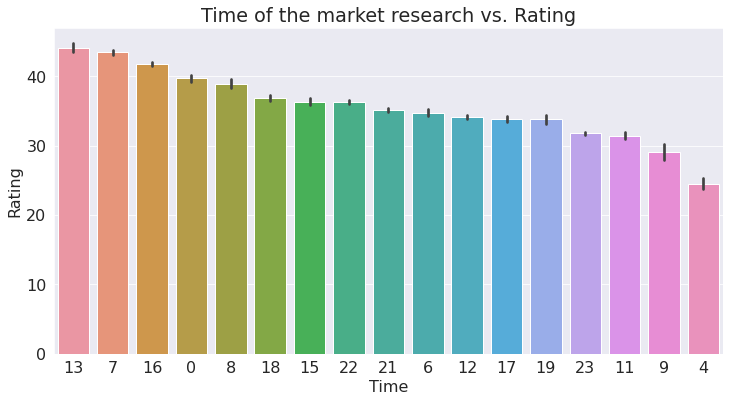

In [42]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Time of the market research vs. Rating')
sns.barplot(x='Time', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=0, ha='center')
plt.show();

In [43]:
plot_order= training_merge_df.groupby('Artist')['Rating'].mean().sort_values(ascending=False).index.values

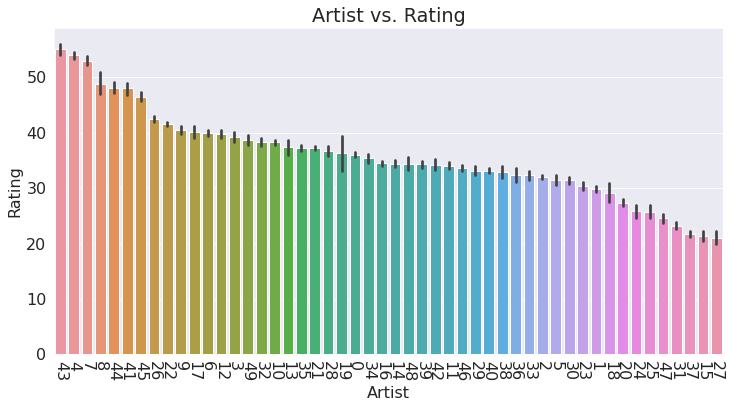

In [44]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Artist vs. Rating')
sns.barplot(x='Artist', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=270, ha='center')
plt.show();

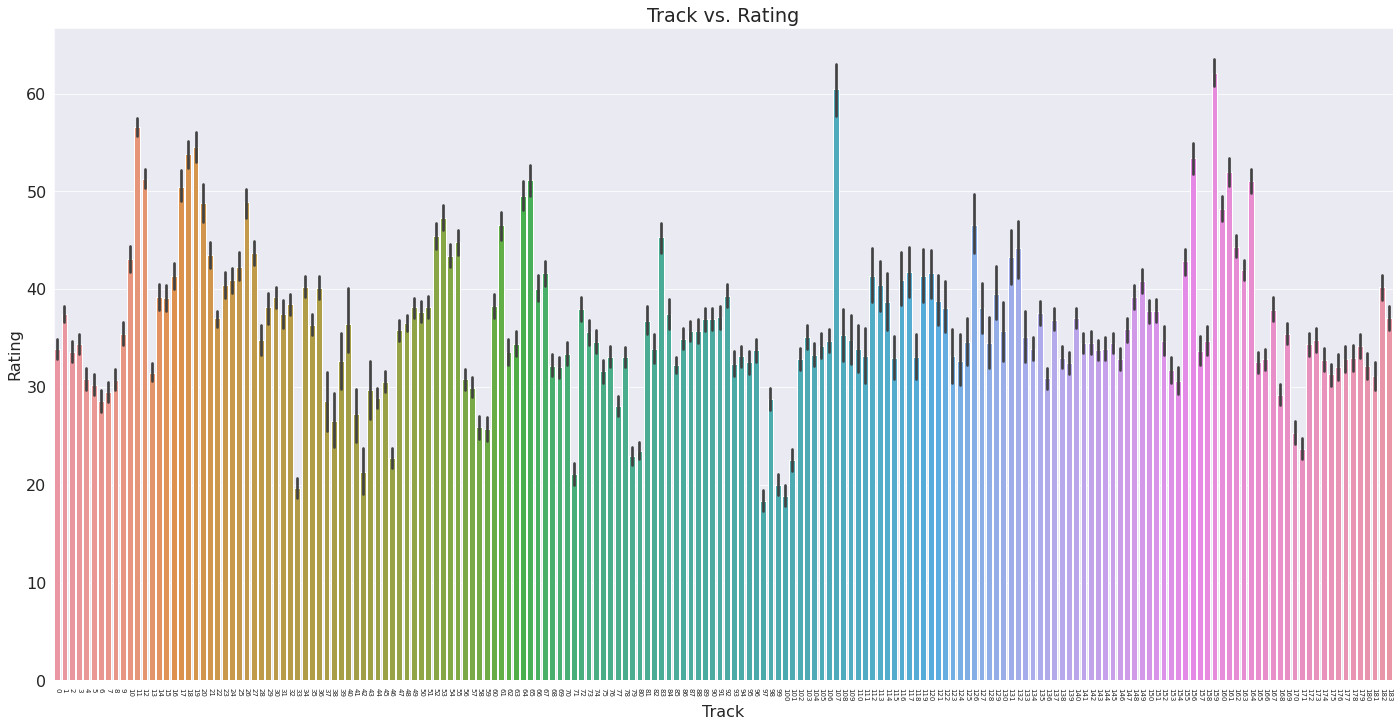

In [45]:
fig, ax = plt.subplots(figsize=(24,12))

plt.title('Track vs. Rating')
sns.barplot(x='Track', y='Rating', data=training_merge_df)
plt.xticks(rotation=-90, fontsize=7, ha='center')
plt.show();

# Change of columns

In [46]:
training_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188690 entries, 0 to 188689
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            188690 non-null  int64  
 1   Track             188690 non-null  int64  
 2   User              188690 non-null  int64  
 3   Rating            188690 non-null  int64  
 4   Time              188690 non-null  int64  
 5   HEARD_OF          186418 non-null  object 
 6   OWN_ARTIST_MUSIC  56835 non-null   object 
 7   LIKE_ARTIST       55028 non-null   float64
 8   words_score       186636 non-null  float64
 9   GENDER            176833 non-null  object 
 10  AGE               174982 non-null  float64
 11  WORKING           140545 non-null  object 
 12  REGION            167481 non-null  object 
 13  MUSIC             176833 non-null  object 
 14  LIST_OWN          158651 non-null  object 
 15  LIST_BACK         158790 non-null  object 
 16  Q1                17

In [47]:
training_merge_df['HEARD_OF'].value_counts()

Never heard of                             94090
Heard of                                   35493
Heard of and listened to music EVER        29854
Heard of and listened to music RECENTLY    17847
Ever heard music by                         5136
Listened to recently                        2191
Ever heard of                               1807
Name: HEARD_OF, dtype: int64

In [48]:
print('Missing values in HEARD_OF column {}'.format(training_merge_df['HEARD_OF'].isna().sum()))

Missing values in HEARD_OF column 2272


In [49]:
training_merge_df['HEARD_OF'].replace(['Ever heard of'], 'Never heard of', inplace=True)
training_merge_df['HEARD_OF'].replace(['Ever heard music by'], 'Heard of and listened to music EVER', inplace=True)
training_merge_df['HEARD_OF'].replace(['Listened to recently'], 'Heard of and listened to music RECENTLY', inplace=True)
training_merge_df['HEARD_OF'].fillna('Never heard of', inplace=True)

In [50]:
training_merge_df['HEARD_OF'].unique()

array(['Never heard of', 'Heard of and listened to music EVER',
       'Heard of', 'Heard of and listened to music RECENTLY'],
      dtype=object)

In [51]:
test_merge_df['HEARD_OF'].replace(['Ever heard of'], 'Never heard of', inplace=True)
test_merge_df['HEARD_OF'].replace(['Ever heard music by'], 'Heard of and listened to music EVER', inplace=True)
test_merge_df['HEARD_OF'].replace(['Listened to recently'], 'Heard of and listened to music RECENTLY', inplace=True)
test_merge_df['HEARD_OF'].fillna('Never heard of', inplace=True)

In [52]:
test_merge_df['HEARD_OF'].unique()

array(['Heard of and listened to music EVER', 'Never heard of',
       'Heard of', 'Heard of and listened to music RECENTLY'],
      dtype=object)

In [53]:
training_merge_df['HEARD_OF'].value_counts()

Never heard of                             98169
Heard of                                   35493
Heard of and listened to music EVER        34990
Heard of and listened to music RECENTLY    20038
Name: HEARD_OF, dtype: int64

In [54]:
plot_order= training_merge_df.groupby('HEARD_OF')['Rating'].mean().sort_values(ascending=False).index.values

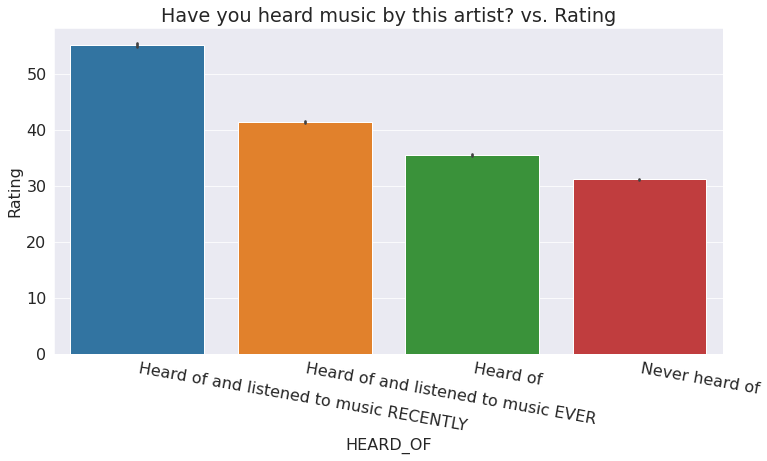

In [55]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Have you heard music by this artist? vs. Rating')
sns.barplot(x='HEARD_OF', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=350, ha='left')
plt.show();

# Own_Artist_Music

In [56]:
training_merge_df['OWN_ARTIST_MUSIC'].unique()

array([nan, 'Own none of their music', 'Own a little of their music',
       'Own all or most of their music', 'DonÕt know',
       'Own a lot of their music', 'DonÍt know', 'don`t know'],
      dtype=object)

In [57]:
training_merge_df['OWN_ARTIST_MUSIC'].value_counts()

Own none of their music           26810
Own a little of their music       18721
Own a lot of their music           7263
Own all or most of their music     2593
DonÕt know                         1265
DonÍt know                          147
don`t know                           36
Name: OWN_ARTIST_MUSIC, dtype: int64

In [58]:
training_merge_df['OWN_ARTIST_MUSIC'].replace(['DonÕt know'], 'Own none of their music', inplace=True)
training_merge_df['OWN_ARTIST_MUSIC'].replace(['DonÍt know'], 'Own none of their music', inplace=True)
training_merge_df['OWN_ARTIST_MUSIC'].replace(['don`t know'], 'Own none of their music', inplace=True)
training_merge_df['OWN_ARTIST_MUSIC'].fillna('Own none of their music', inplace=True)

In [59]:
test_merge_df['OWN_ARTIST_MUSIC'].replace(['DonÕt know'], 'Own none of their music', inplace=True)
test_merge_df['OWN_ARTIST_MUSIC'].replace(['DonÍt know'], 'Own none of their music', inplace=True)
test_merge_df['OWN_ARTIST_MUSIC'].replace(['don`t know'], 'Own none of their music', inplace=True)
test_merge_df['OWN_ARTIST_MUSIC'].fillna('Own none of their music', inplace=True)

In [60]:
training_merge_df['OWN_ARTIST_MUSIC'].unique()

array(['Own none of their music', 'Own a little of their music',
       'Own all or most of their music', 'Own a lot of their music'],
      dtype=object)

In [61]:
training_merge_df['OWN_ARTIST_MUSIC'].value_counts()

Own none of their music           160113
Own a little of their music        18721
Own a lot of their music            7263
Own all or most of their music      2593
Name: OWN_ARTIST_MUSIC, dtype: int64

In [62]:
plot_order= training_merge_df.groupby('OWN_ARTIST_MUSIC')['Rating'].mean().sort_values(ascending=False).index.values

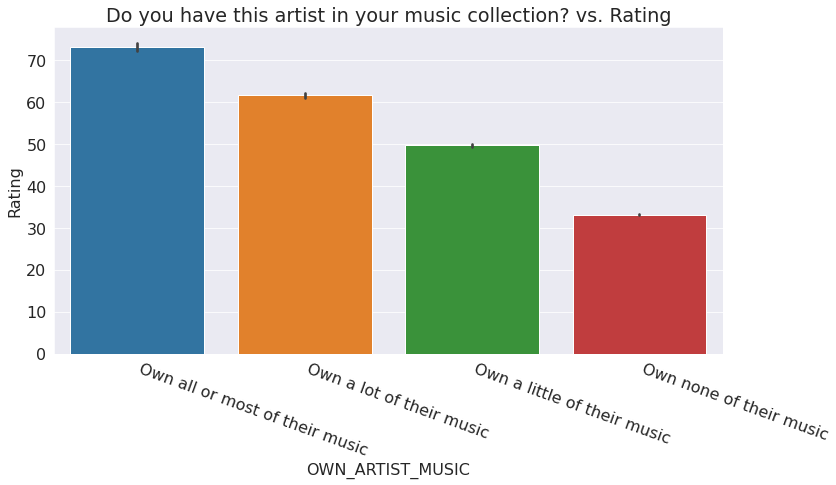

In [63]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Do you have this artist in your music collection? vs. Rating')
sns.barplot(x='OWN_ARTIST_MUSIC', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=340, ha='left')
plt.show();

# LIKE_ARTIST

In [64]:
training_merge_df['LIKE_ARTIST'].unique()

array([   nan,  28.  ,  18.  ,  33.  ,  36.  ,  53.  ,  50.  ,  63.  ,
        68.  ,  56.  ,  74.  ,  51.  ,  38.  ,  29.  ,  71.  ,  90.  ,
        70.  ,  30.  ,  52.  ,  84.  ,  59.  ,  66.  ,  42.  ,  48.  ,
        32.  ,  49.  ,  81.  , 100.  ,  45.  ,  87.  ,  57.  ,  83.  ,
        92.  ,  75.  ,  47.  ,  13.  ,  41.  ,  17.  ,  12.  ,   1.  ,
         4.  ,  55.  ,  65.  ,  16.  ,  58.  ,  99.  ,  69.  ,  15.  ,
        27.  ,  46.  ,  10.  ,  44.  ,  35.  ,   6.  ,  31.  ,  73.  ,
        26.  ,   2.  ,  43.  ,  54.  ,  61.  ,   9.  ,  14.  ,  62.  ,
        67.  ,  89.  ,  72.  ,  39.  ,   7.  ,   5.  ,  31.34,  20.  ,
        88.  ,  25.  ,  94.  ,  77.  ,  82.  ,  64.  ,  80.  ,  22.  ,
        23.  ,  86.  ,  40.  ,  37.  ,  34.  ,  21.  ,  93.  ,  11.  ,
        91.  ,  30.92,  98.  ,  79.  ,   8.  ,  33.05,   3.  ,  76.  ,
        85.  ,  78.  ,  60.  ,  24.  ,  97.  ,  19.  ,  95.  ,  29.21,
        28.14,  96.  ,  62.47,  48.83,  54.58,  23.24,  39.45,   0.  ,
      

In [65]:
training_merge_df['LIKE_ARTIST'].value_counts()

49.00    2707
51.00    2463
30.00    2425
50.00    2218
29.00    2114
         ... 
44.99       1
57.57       1
60.55       1
98.08       1
80.38       1
Name: LIKE_ARTIST, Length: 168, dtype: int64

In [66]:
training_merge_df

Artist  Track   User  Rating  Time  \
0           40    179  47994       9    17   
1            9     23   8575      58     7   
2           46    168  45475      13    16   
3           11    153  39508      42    15   
4           14     32  11565      54    19   
...        ...    ...    ...     ...   ...   
188685       0      3   1278      29     6   
188686       1      6   2839      30    18   
188687      10    142  35756      61    12   
188688      22     54  20163      46    21   
188689      47    171  45580      12     4   

                                       HEARD_OF          OWN_ARTIST_MUSIC  \
0                                Never heard of   Own none of their music   
1                                Never heard of   Own none of their music   
2                                Never heard of   Own none of their music   
3           Heard of and listened to music EVER   Own none of their music   
4           Heard of and listened to music EVER   Own none of their music   
...                                         ...                       ...   
188685                           Never heard of   Own none of their music   
188686                                 Heard of   Own none of their music   
188687                                 Heard of   Own none of their music   
188688  Heard of and listened to music RECENTLY  Own a lot of their music   
188689  Heard of and listened to music RECENTLY   Own none of their music   

        LIKE_ARTIST  words_score  GENDER   AGE  \
0               NaN         -2.0  Female  41.0   
1               NaN          5.0  Female  45.0   
2               NaN          1.0    Male  23.0   
3              28.0          4.0  Female  61.0   
4              18.0          2.0  Female  20.0   
...             ...          ...     ...   ...   
188685          NaN          3.0  Female  53.0   
188686          NaN         -1.0    Male  52.0   
188687          NaN          3.0  Female  28.0   
188688         74.0         10.0  Female  35.0   
188689          7.0          1.0  Female  82.0   

                                   WORKING    REGION  \
0                   Temporarily unemployed     North   
1                                      NaN    Centre   
2             Employed 8-29 hours per week  Midlands   
3             Retired from self-employment  Midlands   
4                   Temporarily unemployed     South   
...                                    ...       ...   
188685                                 NaN     North   
188686           Employed 30+ hours a week  Midlands   
188687  Full-time housewife / househusband     North   
188688           Employed 30+ hours a week     North   
188689                                 NaN    Centre   

                                                    MUSIC           LIST_OWN  \
0        Music means a lot to me and is a passion of mine            3 hours   
1       Music is important to me but not necessarily m...                  1   
2        Music means a lot to me and is a passion of mine            5 hours   
3       Music is important to me but not necessarily m...             1 hour   
4       Music is important to me but not necessarily m...  Less than an hour   
...                                                   ...                ...   
188685  Music is important to me but not necessarily m...                  1   
188686  I like music but it does not feature heavily i...             1 hour   
188687  Music is important to me but not necessarily m...                NaN   
188688  Music is important to me but not necessarily m...             1 hour   
188689  Music is important to me but not necessarily m...                  0   

       LIST_BACK     Q1    Q2    Q3    Q4    Q5    Q6    Q7    Q8    Q9   Q10  \
0        0 Hours   62.0  22.0  62.0  48.0  35.0  30.0  48.0  28.0  88.0  70.0   
1              2   32.0  57.0  52.0  10.0  10.0  29.0  73.0  51.0  12.0  50.0   
2            NaN  100.0  75.0  90.0  48.0  25.0  34.

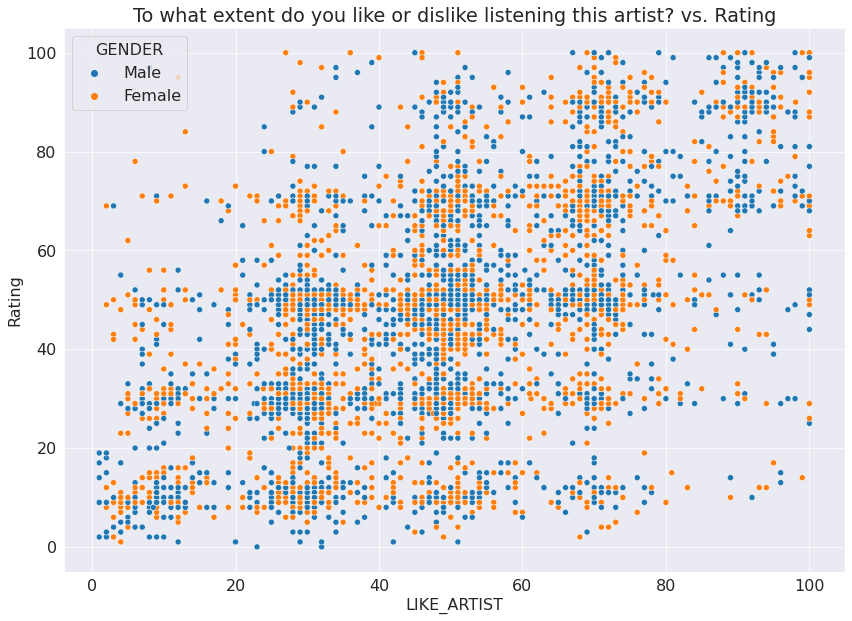

In [67]:
plt.title('To what extent do you like or dislike listening this artist? vs. Rating')
sns.scatterplot(x='LIKE_ARTIST', y='Rating', hue='GENDER', data=training_merge_df.sample(15000));

In [68]:
training_merge_df[training_merge_df['LIKE_ARTIST'].isna()].Rating.describe()

count    133662.000000
mean         32.326353
std          20.782582
min           0.000000
25%          12.000000
50%          30.000000
75%          48.000000
max         100.000000
Name: Rating, dtype: float64

In [69]:
training_merge_df.Rating.describe()

count    188690.000000
mean         36.435391
std          22.586036
min           0.000000
25%          15.000000
50%          32.000000
75%          50.000000
max         100.000000
Name: Rating, dtype: float64

In [71]:
training_merge_df[~training_merge_df['LIKE_ARTIST'].isna()].Rating.describe()

count    55028.000000
mean        46.416170
std         23.653523
min          0.000000
25%         30.000000
50%         48.000000
75%         64.250000
max        100.000000
Name: Rating, dtype: float64

# Words_Score

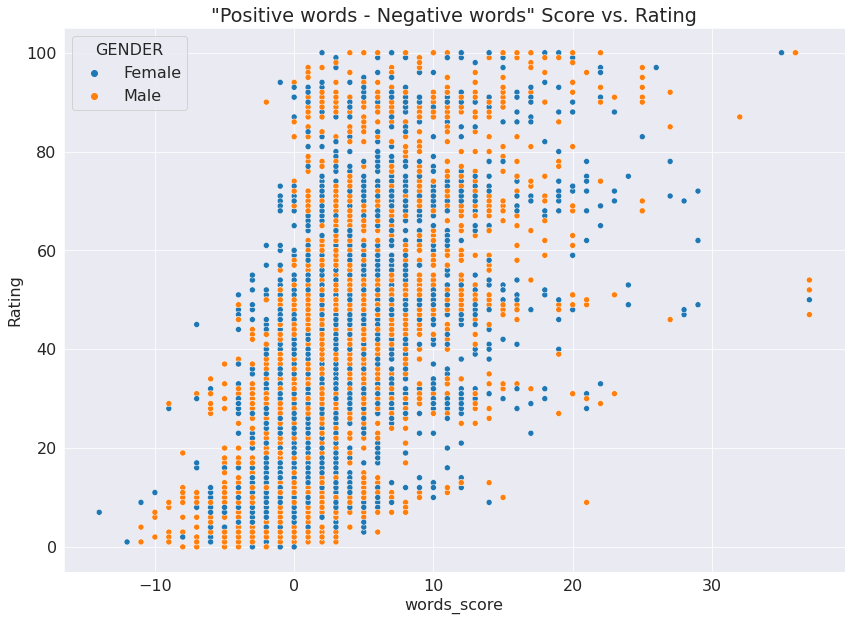

In [72]:
plt.title('"Positive words - Negative words" Score vs. Rating')
sns.scatterplot(x='words_score', y='Rating', hue='GENDER', data=training_merge_df.sample(10000));

# GENDER

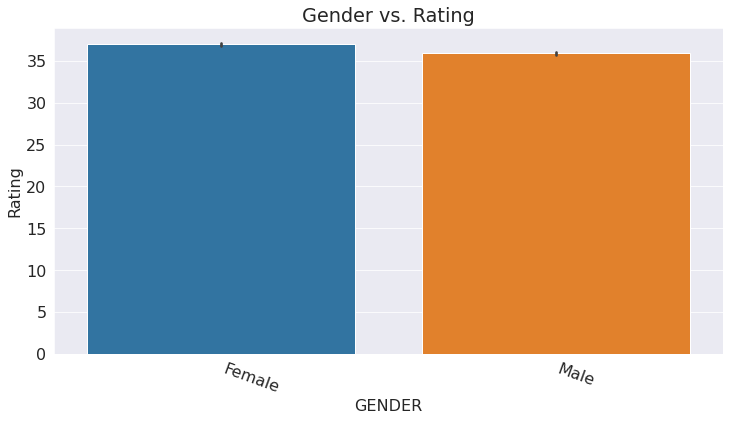

In [74]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Gender vs. Rating')
sns.barplot(x='GENDER', y='Rating', data=training_merge_df)
plt.xticks(rotation=340, ha='left')
plt.show();

# AGE

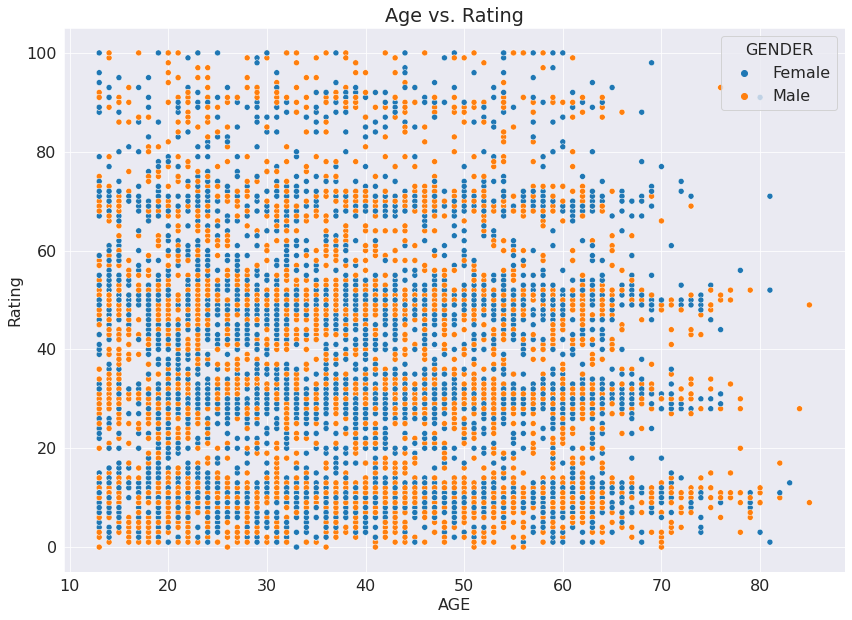

In [76]:
plt.title('Age vs. Rating')
sns.scatterplot(x='AGE', y='Rating', hue='GENDER', data=training_merge_df.sample(10000));

In [78]:
training_merge_df['AGE'].describe()

count    174982.000000
mean         39.246923
std          16.035515
min          13.000000
25%          25.000000
50%          39.000000
75%          52.000000
max          94.000000
Name: AGE, dtype: float64

In [82]:
print('Nan cells in the training_merge_df table {}'.format(training_merge_df['AGE'].isna().sum()))

Nan cells in the training_merge_df table 13708


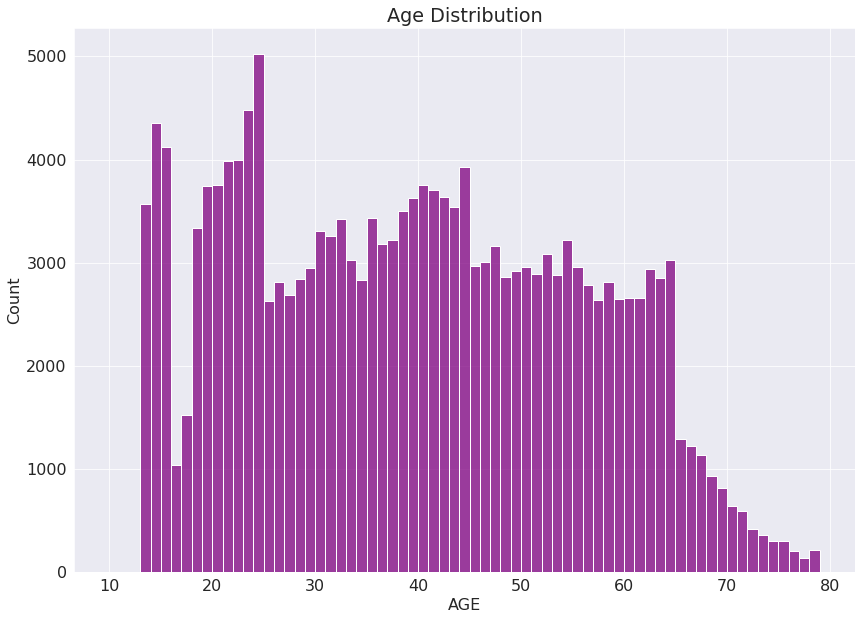

In [83]:
plt.title('Age Distribution')
sns.histplot(training_merge_df.AGE, bins=np.arange(10,80,1), color='purple');

In [85]:
training_merge_df[training_merge_df['AGE'] > 50].AGE.count()

48897

In [86]:
def age_to_categorical(x):
  try:
    if int(x) <= 17:
      return '13-17'
    elif 17< int(x) <= 25:
      return '18-25'
    elif 25< int(x) <= 35:
      return '26-35'
    elif 35< int(x) <= 50:
      return '36-50'
    elif 50< int(x) <= 65:
      return '51-65'
    else:
      return 'older than 65'
  except:
    return np.nan

In [87]:
training_merge_df['AGE_GROUP'] = training_merge_df['AGE'].apply(lambda x: age_to_categorical(x))

In [89]:
training_merge_df['AGE_GROUP'].value_counts()

36-50            49963
51-65            41315
18-25            30944
26-35            30573
13-17            14605
older than 65     7582
Name: AGE_GROUP, dtype: int64

In [90]:
training_merge_df['AGE_GROUP'].fillna('36-50', inplace=True)
training_merge_df['AGE'].fillna(39, inplace=True)

Test DataFrame

In [91]:
test_merge_df['AGE_GROUP'] = test_merge_df['AGE'].apply(lambda x: age_to_categorical(x))
test_merge_df['AGE_GROUP'].fillna('36-50', inplace=True)
test_merge_df['AGE'].fillna(39, inplace=True)

In [92]:
plot_order= training_merge_df.groupby('AGE_GROUP')['Rating'].mean().sort_values(ascending=False).index.values

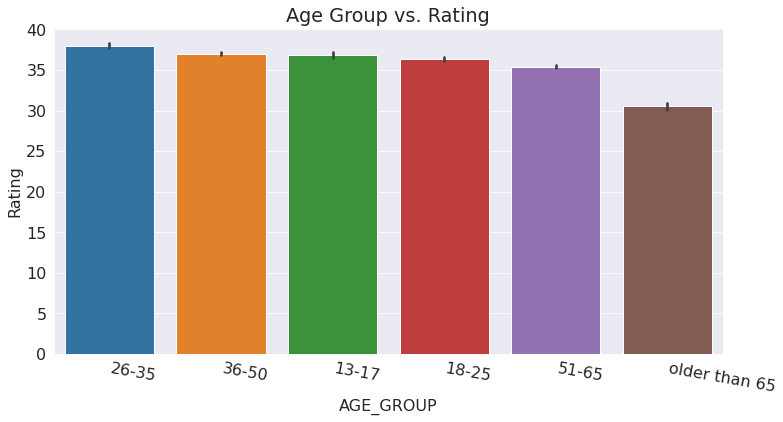

In [94]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Age Group vs. Rating')
sns.barplot(x='AGE_GROUP', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=350, ha='left')
plt.show();

# Working

In [96]:
training_merge_df['WORKING'].value_counts()

Employed 30+ hours a week                                 53347
Full-time student                                         20244
Employed 8-29 hours per week                              16284
Retired from full-time employment (30+ hours per week)    13234
Full-time housewife / househusband                        10367
Self-employed                                              7629
Temporarily unemployed                                     7528
Other                                                      5725
Retired from self-employment                               1480
Employed part-time less than 8 hours per week              1480
In unpaid employment (e.g. voluntary work)                 1407
Prefer not to state                                         947
Part-time student                                           873
Name: WORKING, dtype: int64

In [97]:
plot_order= training_merge_df.groupby('WORKING')['Rating'].mean().sort_values(ascending=False).index.values

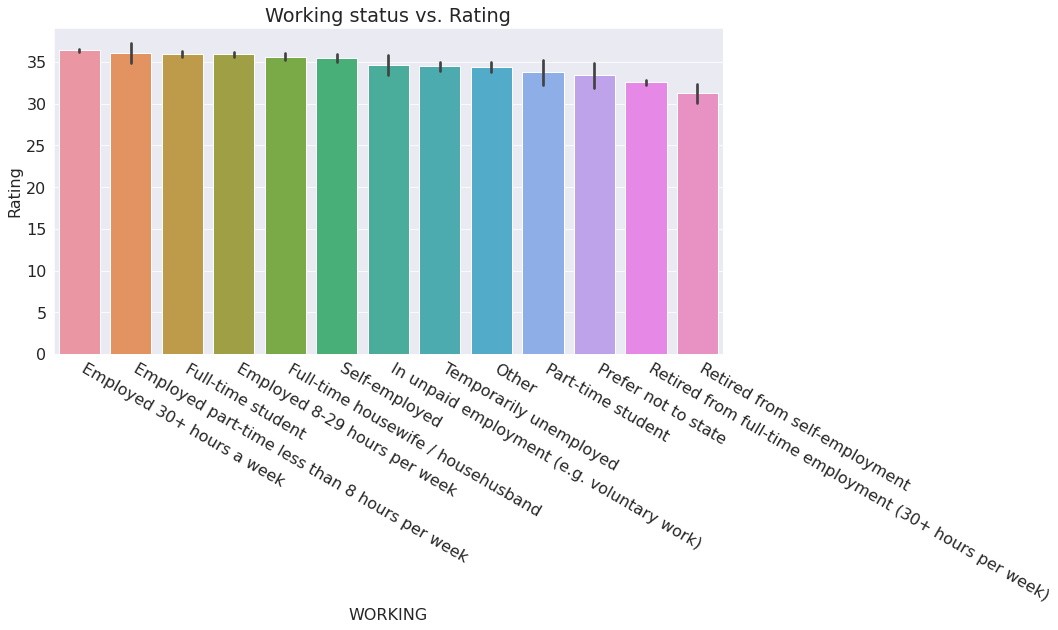

In [100]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Working status vs. Rating')
sns.barplot(x='WORKING', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=330, ha='left')
plt.show();

# Region

In [103]:
training_merge_df['REGION'].unique()

array(['North', 'Centre', 'Midlands', 'South', nan, 'Northern Ireland',
       'North Ireland'], dtype=object)

In [105]:
training_merge_df['REGION'].value_counts()

North               58707
South               54005
Midlands            44220
Centre               7284
Northern Ireland     2890
North Ireland         375
Name: REGION, dtype: int64

In [106]:
training_merge_df['REGION'].replace(['North Ireland'], 'Northern Ireland', inplace=True)
test_merge_df['REGION'].replace(['North Ireland'], 'Northern Ireland', inplace=True)

In [107]:
plot_order= training_merge_df.groupby('REGION')['Rating'].mean().sort_values(ascending=False).index.values

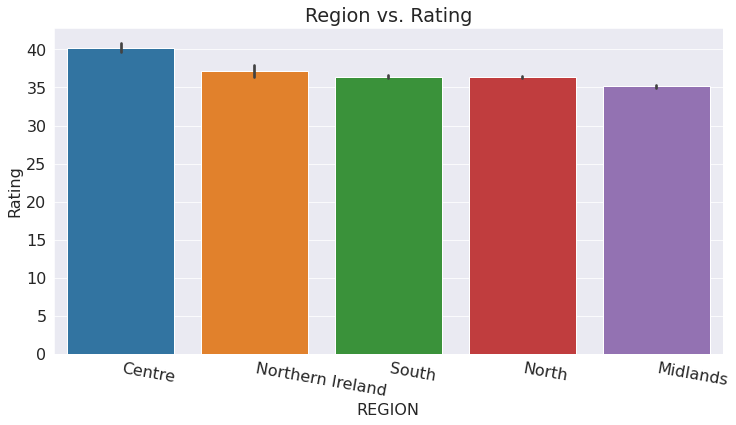

In [109]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Region vs. Rating')
sns.barplot(x='REGION', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=350, ha='left')
plt.show();

# Music

In [110]:
training_merge_df['MUSIC'].unique()

array(['Music means a lot to me and is a passion of mine',
       'Music is important to me but not necessarily more important',
       'I like music but it does not feature heavily in my life',
       'Music is important to me but not necessarily more important than other hobbies or interests',
       nan, 'Music has no particular interest for me',
       'Music is no longer as important as it used to be to me'],
      dtype=object)

In [111]:
training_merge_df['MUSIC'].value_counts()

Music is important to me but not necessarily more important                                    56695
Music means a lot to me and is a passion of mine                                               54793
I like music but it does not feature heavily in my life                                        43023
Music is important to me but not necessarily more important than other hobbies or interests    12977
Music is no longer as important as it used to be to me                                          5702
Music has no particular interest for me                                                         3643
Name: MUSIC, dtype: int64

In [112]:
training_merge_df['MUSIC'].replace(['Music is important to me but not necessarily more important'], 'Music is important to me but not necessarily more important than other hobbies or interests', inplace=True)
test_merge_df['MUSIC'].replace(['Music is important to me but not necessarily more important'], 'Music is important to me but not necessarily more important than other hobbies or interests', inplace=True)

In [113]:
training_merge_df['MUSIC'].value_counts()

Music is important to me but not necessarily more important than other hobbies or interests    69672
Music means a lot to me and is a passion of mine                                               54793
I like music but it does not feature heavily in my life                                        43023
Music is no longer as important as it used to be to me                                          5702
Music has no particular interest for me                                                         3643
Name: MUSIC, dtype: int64

In [114]:
plot_order= training_merge_df.groupby('MUSIC')['Rating'].mean().sort_values(ascending=False).index.values

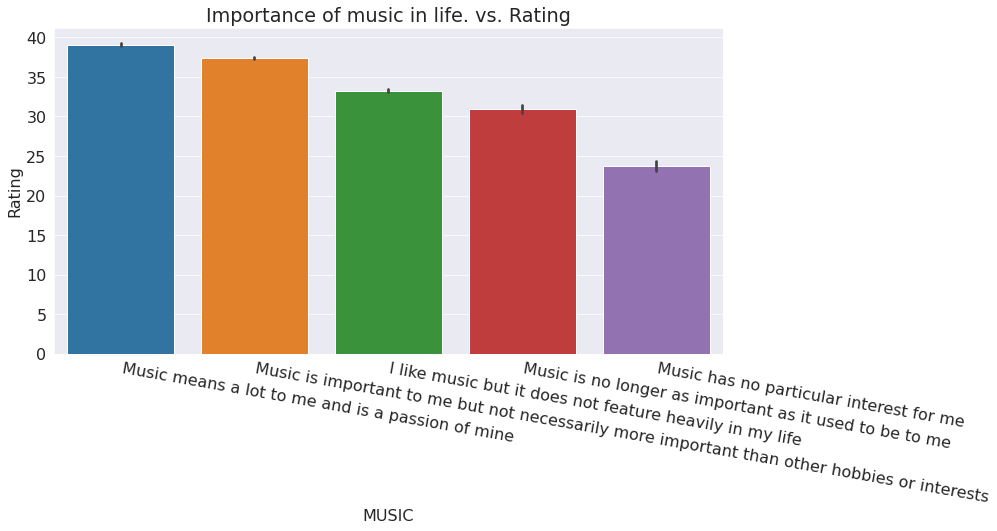

In [116]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Importance of music in life. vs. Rating')
sns.barplot(x='MUSIC', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=350, ha='left')
plt.show();

# List own

In [117]:
training_merge_df['LIST_OWN'].unique()

array(['3 hours', '1', '5 hours', '1 hour', 'Less than an hour',
       '0 Hours', nan, '2', '2 hours', '4 hours', '10 hours', '16+ hours',
       '0', '6 hours', '8 hours', '4', '3', '14 hours', '15 hours',
       '7 hours', '13 hours', '12 hours', '5', '6', '8', '10', '12',
       '9 hours', '7', '11 hours', '16 hours', '15', 'More than 16 hours',
       '20', '16', '9', '17', '14', '11', '18', '22', '24', '13'],
      dtype=object)

In [118]:
training_merge_df['LIST_OWN'].value_counts()

1 hour                29683
2 hours               27505
Less than an hour     26697
3 hours               13078
0 Hours               12367
1                      8801
4 hours                8116
2                      6937
5 hours                4430
3                      2959
0                      2792
6 hours                2744
16+ hours              1978
8 hours                1874
10 hours               1807
4                      1465
7 hours                1164
5                       940
12 hours                774
9 hours                 471
6                       361
11 hours                235
8                       234
15 hours                231
10                      217
14 hours                193
16 hours                130
7                       121
13 hours                106
12                       94
9                        40
15                       22
14                       20
16                       17
20                       13
More than 16 hours  

In [120]:
training_merge_df['LIST_OWN'].isna().sum()

30039

In [121]:
training_merge_df['LIST_OWN'].replace(['0 Hours'], '0', inplace=True)
training_merge_df['LIST_OWN'].replace(['Less than an hour'], '0.5', inplace=True)
training_merge_df['LIST_OWN'].replace(['1 hour'], '1', inplace=True)
training_merge_df['LIST_OWN'].replace(['2 hours'], '2', inplace=True)
training_merge_df['LIST_OWN'].replace(['3 hours'], '3', inplace=True)
training_merge_df['LIST_OWN'].replace(['4 hours'], '4', inplace=True)
training_merge_df['LIST_OWN'].replace(['5 hours'], '5', inplace=True)
training_merge_df['LIST_OWN'].replace(['6 hours'], '6', inplace=True)
training_merge_df['LIST_OWN'].replace(['7 hours'], '7', inplace=True)
training_merge_df['LIST_OWN'].replace(['8 hours'], '8', inplace=True)
training_merge_df['LIST_OWN'].replace(['9 hours'], '9', inplace=True)
training_merge_df['LIST_OWN'].replace(['10 hours'], '10', inplace=True)
training_merge_df['LIST_OWN'].replace(['11 hours'], '11', inplace=True)
training_merge_df['LIST_OWN'].replace(['12 hours'], '12', inplace=True)
training_merge_df['LIST_OWN'].replace(['13 hours'], '13', inplace=True)
training_merge_df['LIST_OWN'].replace(['14 hours'], '14', inplace=True)
training_merge_df['LIST_OWN'].replace(['15 hours'], '15', inplace=True)
training_merge_df['LIST_OWN'].replace(['16 hours'], '16', inplace=True)
training_merge_df['LIST_OWN'].replace(['16+ hours'], '16', inplace=True)
training_merge_df['LIST_OWN'].replace(['More than 16 hours'], '16', inplace=True)

In [122]:
training_merge_df['LIST_OWN'].fillna('No Answer', inplace=True)

Test DataFrame

In [123]:
test_merge_df['LIST_OWN'].replace(['0 Hours'], '0', inplace=True)
test_merge_df['LIST_OWN'].replace(['Less than an hour'], '0.5', inplace=True)
test_merge_df['LIST_OWN'].replace(['1 hour'], '1', inplace=True)
test_merge_df['LIST_OWN'].replace(['2 hours'], '2', inplace=True)
test_merge_df['LIST_OWN'].replace(['3 hours'], '3', inplace=True)
test_merge_df['LIST_OWN'].replace(['4 hours'], '4', inplace=True)
test_merge_df['LIST_OWN'].replace(['5 hours'], '5', inplace=True)
test_merge_df['LIST_OWN'].replace(['6 hours'], '6', inplace=True)
test_merge_df['LIST_OWN'].replace(['7 hours'], '7', inplace=True)
test_merge_df['LIST_OWN'].replace(['8 hours'], '8', inplace=True)
test_merge_df['LIST_OWN'].replace(['9 hours'], '9', inplace=True)
test_merge_df['LIST_OWN'].replace(['10 hours'], '10', inplace=True)
test_merge_df['LIST_OWN'].replace(['11 hours'], '11', inplace=True)
test_merge_df['LIST_OWN'].replace(['12 hours'], '12', inplace=True)
test_merge_df['LIST_OWN'].replace(['13 hours'], '13', inplace=True)
test_merge_df['LIST_OWN'].replace(['14 hours'], '14', inplace=True)
test_merge_df['LIST_OWN'].replace(['15 hours'], '15', inplace=True)
test_merge_df['LIST_OWN'].replace(['16 hours'], '16', inplace=True)
test_merge_df['LIST_OWN'].replace(['16+ hours'], '16', inplace=True)
test_merge_df['LIST_OWN'].replace(['More than 16 hours'], '16', inplace=True)
test_merge_df['LIST_OWN'].fillna('No Answer', inplace=True)

In [124]:
plot_order= training_merge_df.groupby('LIST_OWN')['Rating'].mean().sort_values(ascending=False).index.values

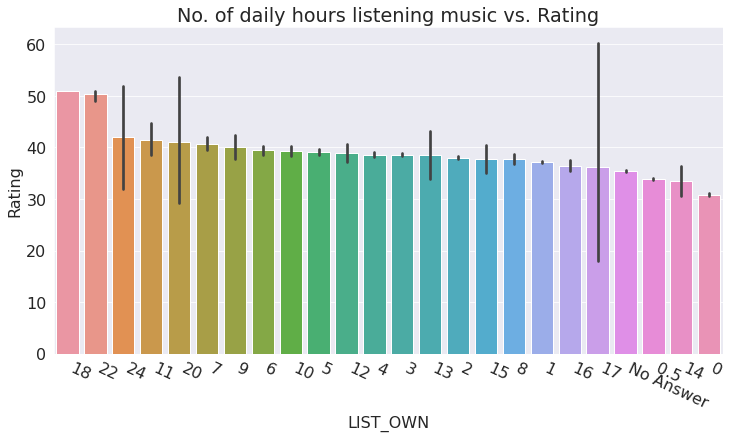

In [130]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('No. of daily hours listening music vs. Rating')
sns.barplot(x='LIST_OWN', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=335, ha='left')
plt.show();

In [131]:
lo_mapper = {'No Answer': 'No Answer', 
          '0': '0', 
          '0.5': '0.5',
          '1': '1',
          '2': '2',
          '3': '3-6',
          '4': '3-6',
          '5': '3-6',
          '6': '3-6',
          '7': '7-10',
          '8': '7-10',
          '9': '7-10',
          '10': '7-10',
          '11': '11-14',
          '12':  '11-14',
          '13': '11-14',
          '14': '11-14',
          '15': '15-19',
          '16': '15-19',
          '17': '15-19',
          '18': '15-19',
          '19': '15-19',
          '20': '20 and plus',
          '21': '20 and plus',
          '22': '20 and plus',
          '23': '20 and plus',
          '24': '20 and plus'
          }

In [132]:
training_merge_df['LIST_OWN'] = training_merge_df['LIST_OWN'].map(lo_mapper)

In [133]:
training_merge_df['LIST_OWN'].unique()

array(['3-6', '1', '0.5', '0', 'No Answer', '2', '7-10', '15-19', '11-14',
       '20 and plus'], dtype=object)

In [135]:
training_merge_df['LIST_OWN'].value_counts()

1              38484
2              34442
3-6            34093
No Answer      30039
0.5            26697
0              15159
7-10            5928
15-19           2399
11-14           1431
20 and plus       18
Name: LIST_OWN, dtype: int64

In [136]:
plot_order= training_merge_df.groupby('LIST_OWN')['Rating'].mean().sort_values(ascending=False).index.values

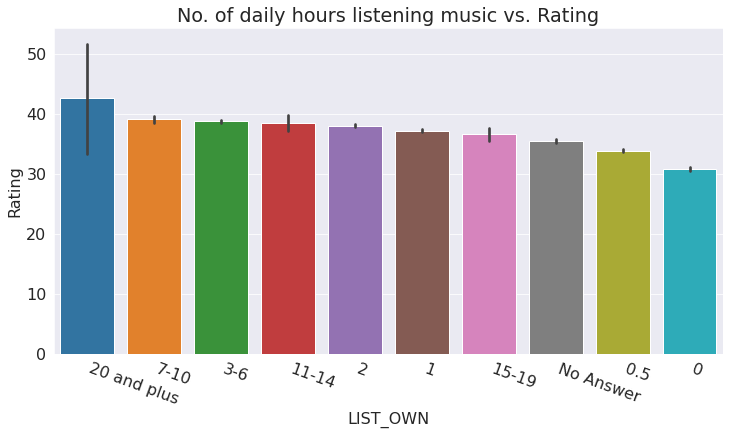

In [138]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('No. of daily hours listening music vs. Rating')
sns.barplot(x='LIST_OWN', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=340, ha='left')
plt.show();

In [139]:
test_merge_df['LIST_OWN'] = test_merge_df['LIST_OWN'].map(lo_mapper)

# List Back

In [141]:
training_merge_df['LIST_BACK'].unique()

array(['0 Hours', '2', nan, '3 hours', 'Less than an hour', '4 hours',
       '8 hours', '5 hours', '4', '3', '1 hour', '2 hours', '5', '1',
       '6 hours', '7 hours', 'More than 16 hours', '0', '9 hours', '6',
       '14 hours', '16+ hours', '8', '10 hours', '9', '16 hours',
       '15 hours', '12', '12 hours', '10', '20', '18', '11 hours',
       '13 hours', '7', '14', '15', '19', '24', '16', '11', '21'],
      dtype=object)

In [142]:
training_merge_df['LIST_BACK'].value_counts()

2 hours               24663
1 hour                23409
Less than an hour     22232
3 hours               13679
0 Hours               10565
4 hours               10492
1                      6856
5 hours                6170
2                      6027
6 hours                5099
8 hours                4473
3                      3097
16+ hours              2890
0                      2768
7 hours                2572
10 hours               2544
4                      2284
5                      1587
9 hours                1200
12 hours               1171
6                      1119
8                      1013
7                       498
14 hours                369
11 hours                334
15 hours                325
10                      319
16 hours                278
12                      213
13 hours                213
9                       189
20                       36
More than 16 hours       23
15                       17
14                       14
19                  

In [143]:
training_merge_df['LIST_BACK'].replace(['0 Hours'], '0', inplace=True)
training_merge_df['LIST_BACK'].replace(['Less than an hour'], '0.5', inplace=True)
training_merge_df['LIST_BACK'].replace(['1 hour'], '1', inplace=True)
training_merge_df['LIST_BACK'].replace(['2 hours'], '2', inplace=True)
training_merge_df['LIST_BACK'].replace(['3 hours'], '3', inplace=True)
training_merge_df['LIST_BACK'].replace(['4 hours'], '4', inplace=True)
training_merge_df['LIST_BACK'].replace(['5 hours'], '5', inplace=True)
training_merge_df['LIST_BACK'].replace(['6 hours'], '6', inplace=True)
training_merge_df['LIST_BACK'].replace(['7 hours'], '7', inplace=True)
training_merge_df['LIST_BACK'].replace(['8 hours'], '8', inplace=True)
training_merge_df['LIST_BACK'].replace(['9 hours'], '9', inplace=True)
training_merge_df['LIST_BACK'].replace(['10 hours'], '10', inplace=True)
training_merge_df['LIST_BACK'].replace(['11 hours'], '11', inplace=True)
training_merge_df['LIST_BACK'].replace(['12 hours'], '12', inplace=True)
training_merge_df['LIST_BACK'].replace(['13 hours'], '13', inplace=True)
training_merge_df['LIST_BACK'].replace(['14 hours'], '14', inplace=True)
training_merge_df['LIST_BACK'].replace(['15 hours'], '15', inplace=True)
training_merge_df['LIST_BACK'].replace(['16 hours'], '16', inplace=True)
training_merge_df['LIST_BACK'].replace(['16+ hours'], '16', inplace=True)
training_merge_df['LIST_BACK'].replace(['More than 16 hours'], '16', inplace=True)

In [144]:
training_merge_df['LIST_BACK'].fillna('No Answer', inplace=True)

In [145]:
training_merge_df['LIST_BACK'] = training_merge_df['LIST_BACK'].map(lo_mapper)

In [146]:
plot_order= training_merge_df.groupby('LIST_BACK')['Rating'].mean().sort_values(ascending=False).index.values

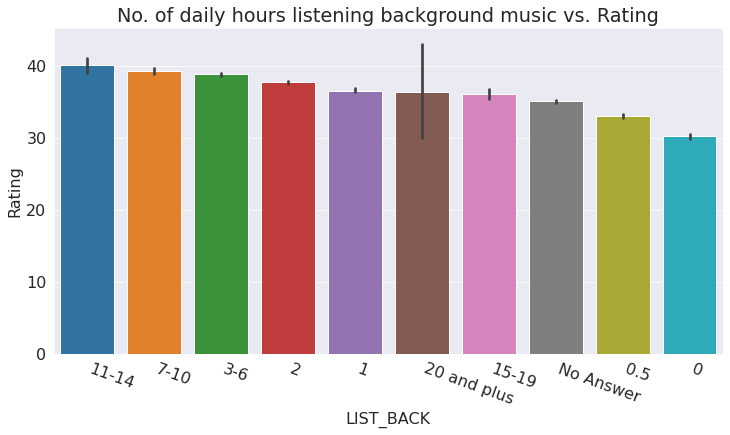

In [147]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('No. of daily hours listening background music vs. Rating')
sns.barplot(x='LIST_BACK', y='Rating', data=training_merge_df, order=plot_order)
plt.xticks(rotation=340, ha='left')
plt.show();

# Test DataFrame

In [149]:
test_merge_df['LIST_BACK'].replace(['0 Hours'], '0', inplace=True)
test_merge_df['LIST_BACK'].replace(['Less than an hour'], '0.5', inplace=True)
test_merge_df['LIST_BACK'].replace(['1 hour'], '1', inplace=True)
test_merge_df['LIST_BACK'].replace(['2 hours'], '2', inplace=True)
test_merge_df['LIST_BACK'].replace(['3 hours'], '3', inplace=True)
test_merge_df['LIST_BACK'].replace(['4 hours'], '4', inplace=True)
test_merge_df['LIST_BACK'].replace(['5 hours'], '5', inplace=True)
test_merge_df['LIST_BACK'].replace(['6 hours'], '6', inplace=True)
test_merge_df['LIST_BACK'].replace(['7 hours'], '7', inplace=True)
test_merge_df['LIST_BACK'].replace(['8 hours'], '8', inplace=True)
test_merge_df['LIST_BACK'].replace(['9 hours'], '9', inplace=True)
test_merge_df['LIST_BACK'].replace(['10 hours'], '10', inplace=True)
test_merge_df['LIST_BACK'].replace(['11 hours'], '11', inplace=True)
test_merge_df['LIST_BACK'].replace(['12 hours'], '12', inplace=True)
test_merge_df['LIST_BACK'].replace(['13 hours'], '13', inplace=True)
test_merge_df['LIST_BACK'].replace(['14 hours'], '14', inplace=True)
test_merge_df['LIST_BACK'].replace(['15 hours'], '15', inplace=True)
test_merge_df['LIST_BACK'].replace(['16 hours'], '16', inplace=True)
test_merge_df['LIST_BACK'].replace(['16+ hours'], '16', inplace=True)
test_merge_df['LIST_BACK'].replace(['More than 16 hours'], '16', inplace=True)
test_merge_df['LIST_BACK'].fillna('No Answer', inplace=True)

test_merge_df['LIST_BACK'] = test_merge_df['LIST_BACK'].map(lo_mapper)

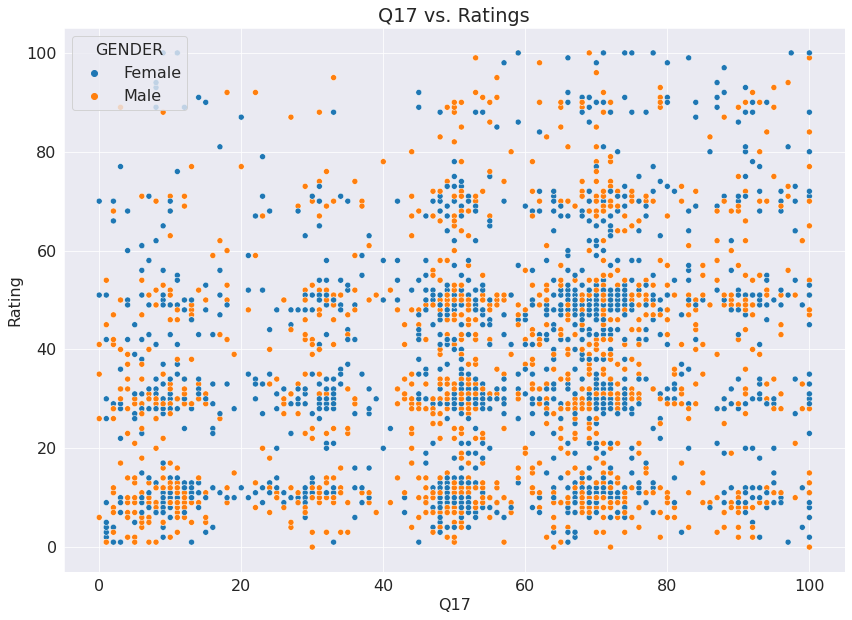

In [156]:
plt.title('Q17 vs. Ratings')
sns.scatterplot(x='Q17', y='Rating', hue='GENDER', data=training_merge_df.sample(3000));

In [158]:
training_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188690 entries, 0 to 188689
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            188690 non-null  int64  
 1   Track             188690 non-null  int64  
 2   User              188690 non-null  int64  
 3   Rating            188690 non-null  int64  
 4   Time              188690 non-null  int64  
 5   HEARD_OF          188690 non-null  object 
 6   OWN_ARTIST_MUSIC  188690 non-null  object 
 7   LIKE_ARTIST       55028 non-null   float64
 8   words_score       186636 non-null  float64
 9   GENDER            176833 non-null  object 
 10  AGE               188690 non-null  float64
 11  WORKING           140545 non-null  object 
 12  REGION            167481 non-null  object 
 13  MUSIC             176833 non-null  object 
 14  LIST_OWN          188690 non-null  object 
 15  LIST_BACK         188690 non-null  object 
 16  Q1                17

# HEARD_OF 

In [159]:
mapper = {'Heard of and listened to music RECENTLY': 4, 
          'Heard of and listened to music EVER': 3,
          'Heard of': 2,
          'Never heard of': 1}

In [160]:
training_merge_df['HEARD_OF'] = training_merge_df['HEARD_OF'].map(mapper)


Test DataFrame

In [162]:
test_merge_df['HEARD_OF'] = test_merge_df['HEARD_OF'].map(mapper)

In [163]:
training_merge_df['HEARD_OF'].unique()

array([1, 3, 2, 4])

In [164]:
training_merge_df['HEARD_OF'].value_counts()

1    98169
2    35493
3    34990
4    20038
Name: HEARD_OF, dtype: int64

# Own Art Music

In [165]:
oam_mapper = {'Own all or most of their music': 4, 
          'Own a lot of their music': 3, 
          'Own a little of their music': 2,
          'Own none of their music': 1}

In [166]:
training_merge_df['OWN_ARTIST_MUSIC'] = training_merge_df['OWN_ARTIST_MUSIC'].map(oam_mapper)

Test DataFrame

In [168]:
test_merge_df['OWN_ARTIST_MUSIC'] = test_merge_df['OWN_ARTIST_MUSIC'].map(oam_mapper)

In [170]:
training_merge_df['OWN_ARTIST_MUSIC'].unique()

array([1, 2, 4, 3])

In [171]:
training_merge_df['OWN_ARTIST_MUSIC'].value_counts()

1    160113
2     18721
3      7263
4      2593
Name: OWN_ARTIST_MUSIC, dtype: int64

# Like Artist

In [172]:
training_merge_df['LIKE_ARTIST'].isna().sum()

133662

In [173]:
def to_categorical(x):
  try:
    if 1<= int(x) <= 10:
      return '1-10'
    elif 11<= int(x) <= 20:
      return '11-20'
    elif 21<= int(x) <= 30:
      return '21-30'
    elif 31<= int(x) <= 40:
      return '31-40'
    elif 41<= int(x) <= 50:
      return '41-50'
    elif 51<= int(x) <= 60:
      return '51-60'
    elif 61<= int(x) <= 70:
      return '61-70'
    elif 71<= int(x) <= 80:
      return '71-80'
    elif 81<= int(x) <= 90:
      return '81-90'
    else:
      return '91-100'
  except:
    return np.nan

In [174]:
training_merge_df['LIKE_ARTIST'] = training_merge_df['LIKE_ARTIST'].apply(lambda x: to_categorical(x))

test_merge_df['LIKE_ARTIST'] = test_merge_df['LIKE_ARTIST'].apply(lambda x: to_categorical(x))

In [175]:
training_merge_df['LIKE_ARTIST'].fillna('No Answer', inplace=True)

test_merge_df['LIKE_ARTIST'].fillna('No Answer', inplace=True)

In [176]:
training_merge_df['LIKE_ARTIST'].value_counts()

No Answer    133662
41-50         11114
21-30          8804
51-60          8244
31-40          6574
61-70          6415
71-80          4976
1-10           2825
91-100         2269
11-20          2126
81-90          1681
Name: LIKE_ARTIST, dtype: int64

# Music

In [177]:
training_merge_df['MUSIC'].unique()

array(['Music means a lot to me and is a passion of mine',
       'Music is important to me but not necessarily more important than other hobbies or interests',
       'I like music but it does not feature heavily in my life', nan,
       'Music has no particular interest for me',
       'Music is no longer as important as it used to be to me'],
      dtype=object)

In [178]:
training_merge_df['MUSIC'].value_counts()

Music is important to me but not necessarily more important than other hobbies or interests    69672
Music means a lot to me and is a passion of mine                                               54793
I like music but it does not feature heavily in my life                                        43023
Music is no longer as important as it used to be to me                                          5702
Music has no particular interest for me                                                         3643
Name: MUSIC, dtype: int64

In [179]:
m_mapper = {'Music means a lot to me and is a passion of mine': 6, 
          'Music is important to me but not necessarily more important than other hobbies or interests': 5, 
          'No Answer': 4,
          'I like music but it does not feature heavily in my life': 3,
          'Music is no longer as important as it used to be to me': 2,
          'Music has no particular interest for me': 1,
          }

In [180]:
training_merge_df['MUSIC'] = training_merge_df['MUSIC'].map(m_mapper)

Test DataFrame

In [181]:
test_merge_df['MUSIC'] = test_merge_df['MUSIC'].map(m_mapper)

#Missing Values in DF

In [182]:
training_merge_df['GENDER'].fillna('No Answer', inplace=True)
training_merge_df['WORKING'].fillna('No Answer', inplace=True)
training_merge_df['REGION'].fillna('No Answer', inplace=True)

test_merge_df['GENDER'].fillna('No Answer', inplace=True)
test_merge_df['WORKING'].fillna('No Answer', inplace=True)
test_merge_df['REGION'].fillna('No Answer', inplace=True)

#Training & Validation Sets

### As test set is already given.
We put 20% of Training test into calidation set.

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
training_df, validation_df = train_test_split(training_merge_df, test_size=0.2)

In [187]:
print('training_df.shape :', training_df.shape)
print('validation_df.shape :', validation_df.shape)

training_df.shape : (150952, 36)
validation_df.shape : (37738, 36)


In [188]:
training_df

Artist  Track   User  Rating  Time  HEARD_OF  OWN_ARTIST_MUSIC  \
147322      16    137  34310      51    12         1                 1   
158356      22    129  32892      57     0         1                 1   
28163        9     21  10235      32     7         1                 1   
14376       37     99  31573      10    23         1                 1   
150714      10     26   6021      54     7         4                 2   
...        ...    ...    ...     ...   ...       ...               ...   
39584        2      8   3689      33    18         1                 1   
39240       37     97  31880       7    23         1                 1   
181943      43    160  42541      98    16         4                 2   
136342       7     18   7583      49     7         4                 2   
2422        12     30  12280      29    19         1                 1   

       LIKE_ARTIST  words_score  GENDER   AGE  \
147322   No Answer          2.0  Female  60.0   
158356   No Answer          3.0    Male  40.0   
28163    No Answer          8.0    Male  32.0   
14376    No Answer          2.0  Female  40.0   
150714       41-50          1.0    Male  21.0   
...            ...          ...     ...   ...   
39584    No Answer          0.0  Female  48.0   
39240    No Answer          0.0  Female  51.0   
181943       71-80         22.0    Male  33.0   
136342       71-80         -1.0    Male  14.0   
2422     No Answer          2.0  Female  62.0   

                                   WORKING     REGION  MUSIC LIST_OWN  \
147322  Full-time housewife / househusband   Midlands    5.0        2   
158356                           No Answer  No Answer    5.0        2   
28163                            No Answer     Centre    6.0      3-6   
14376   Full-time housewife / househusband      South    3.0      0.5   
150714                           No Answer      North    6.0     7-10   
...                                    ...        ...    ...      ...   
39584         Employed 8-29 hours per week   Midlands    3.0        1   
39240            Employed 30+ hours a week      South    1.0        0   
181943           Employed 30+ hours a week      North    6.0        2   
136342                           No Answer     Centre    6.0        2   
2422          Employed 8-29 hours per week      South    3.0      0.5   

        LIST_BACK     Q1     Q2     Q3     Q4     Q5     Q6     Q7     Q8  \
147322          1   59.0   61.0   95.0   12.0   16.0   34.0   36.0   35.0   
158356        3-6   67.0   36.0   64.0   36.0   43.0   25.0   85.0   60.0   
28163   No Answer  100.0    2.0  100.0   51.0  100.0   51.0   71.0   51.0   
14376         3-6   11.0   22.0    9.0   15.0   14.0   15.0   12.0    8.0   
150714        3-6  100.0   86.0  100.0    2.0    5.0    8.0    5.0    4.0   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
39584           2   35.0   39.0   46.0   46.0   49.0   52.0   49.0   48.0   
39240           0    3.0    2.0    3.0    4.0    5.0  100.0    1.0    1.0   
181943          2  100.0  100.0  100.0    8.0    9.0    7.0    8.0    8.0   
136342          1   88.0   90.0   98.0  100.0  100.0   31.0  100.0  100.0   
2422          0.5   14.0   13.0    9.0   48.0   48.0   27.0    6.0    6.0   

           Q9    Q10    Q11    Q12    Q13    Q14    Q15    Q16    Q17    Q18  \
147322   53.0   56.0   73.0   76.0   52.0   54.0   54.0   36.0   93.0   73.0   
158356   46.0   34.0   71.0   73.0   63.0   74.0   36.0   38.0   49.0    NaN   
28163    51.0  100.0  100.0  100.0   32.0   52.0   30.0   29.0  100.0    NaN   
14376    79.0   12.0   72.0   76.0   15.0   13.0    5.0    NaN   13.0    9.0   
150714    5.0  100.0   73.0   68.0  100.0  100.0  100.0   77.0   46.0    NaN   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
39584    49.0   49.0   48.0   51.0   50.0   52.0   28.0   33.0   33.0   33.0   
39240     6.0    4.0    2.0    3.0    1.0    1.0    2.0    NaN    1.0    2.0   
181943  

In [189]:
validation_df

Artist  Track   User  Rating  Time  HEARD_OF  OWN_ARTIST_MUSIC  \
98538        2      8   1869      10    18         1                 1   
85024       21     47  20396      50    21         1                 1   
158747      20     45  18100      31    21         1                 1   
3298        18     39  16701      48     9         2                 1   
23034       10    145  35413      57    12         3                 2   
...        ...    ...    ...     ...   ...       ...               ...   
174900      34     86  28431      49    23         1                 1   
188097      24     58  20214      86    21         1                 1   
142478      22    131  32487       9     0         1                 1   
152286      27     71  23462      39    22         1                 1   
65804       11    152  39654      31    15         4                 2   

       LIKE_ARTIST  words_score     GENDER   AGE  \
98538    No Answer         -5.0       Male  66.0   
85024    No Answer          5.0     Female  39.0   
158747   No Answer          2.0       Male  64.0   
3298     No Answer          2.0     Female  23.0   
23034        51-60          8.0       Male  42.0   
...            ...          ...        ...   ...   
174900   No Answer          3.0     Female  61.0   
188097   No Answer          6.0       Male  40.0   
142478   No Answer          0.0     Female  26.0   
152286   No Answer         -1.0  No Answer  39.0   
65804        31-40         11.0       Male  46.0   

                                                  WORKING     REGION  MUSIC  \
98538                        Employed 8-29 hours per week      South    5.0   
85024                           Employed 30+ hours a week   Midlands    5.0   
158747      Employed part-time less than 8 hours per week   Midlands    3.0   
3298                               Temporarily unemployed      North    6.0   
23034                           Employed 30+ hours a week      North    6.0   
...                                                   ...        ...    ...   
174900  Retired from full-time employment (30+ hours p...   Midlands    6.0   
188097                          Employed 30+ hours a week   Midlands    6.0   
142478                                          No Answer  No Answer    5.0   
152286                                          No Answer  No Answer    NaN   
65804                           Employed 30+ hours a week      North    5.0   

         LIST_OWN  LIST_BACK    Q1    Q2    Q3    Q4    Q5    Q6    Q7    Q8  \
98538         0.5          0  72.0  52.0  71.0   6.0   7.0   8.0   8.0   8.0   
85024           1        3-6  48.0  48.0  63.0  51.0  30.0  30.0  29.0  27.0   
158747        0.5        0.5  10.0  49.0   3.0   7.0   6.0  88.0   9.0   9.0   
3298            2        0.5  85.0  79.0  79.0  83.0  74.0  15.0  14.0  13.0   
23034           2          2  94.0  90.0  72.0   4.0  24.0   6.0   7.0  23.0   
...           ...        ...   ...   ...   ...   ...   ...   ...   ...   ...   
174900          1          1  31.0  71.0  49.0  32.0  32.0   8.0   8.0   9.0   
188097          2        3-6  52.0  75.0  75.0  75.0  23.0  49.0  98.0  67.0   
142478          2          1  49.0  64.0  56.0  60.0  30.0  10.0  10.0  30.0   
152286  No Answer  No Answer   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
65804         3-6       7-10  52.0  71.0  50.0  31.0  13.0  33.0  10.0  13.0   

          Q9   Q10   Q11   Q12   Q13   Q14   Q15   Q16   Q17   Q18   Q19  \
98538   93.0  25.0   7.0   7.0   7.0   8.0   7.0   6.0   6.0   6.0   6.0   
85024   72.0  68.0  69.0  51.0  30.0  38.0  29.0  49.0  76.0  56.0  37.0   
158747  69.0   7.0   8.0   7.0   7.0   6.0  10.0   9.0   8.0   7.0   7.0   
3298    39.0  82.0  57.0  61.0   5.0  53.0  66.0  71.0  28.0  74.0  83.0   
23034    8.0  91.0  68.0  78.0  80.0  63.0  82.0  84.0  50.0  87.0  86.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
174900  32.0  32.0  51.0  32.0  12.0  31.0  53.0   N

# Input and Target Col's

In [190]:
input_cols = list(training_df.columns)
input_cols.remove('Rating')
input_cols.remove('AGE')

target_col = 'Rating'

In [191]:
training_inputs = training_df[input_cols].copy()
training_targets = training_df[target_col].copy()

In [227]:
validation_inputs = validation_df[input_cols].copy()
validation_targets = validation_df[target_col].copy()

In [228]:
test_inputs = test_merge_df[input_cols].copy()

In [229]:
training_inputs

Artist     Track      User      Time  HEARD_OF  OWN_ARTIST_MUSIC  \
147322  0.326531  0.748634  0.673709  0.521739       0.0          0.000000   
158356  0.448980  0.704918  0.645866  0.000000       0.0          0.000000   
28163   0.183673  0.114754  0.200974  0.304348       0.0          0.000000   
14376   0.755102  0.540984  0.619966  1.000000       0.0          0.000000   
150714  0.204082  0.142077  0.118228  0.304348       1.0          0.333333   
...          ...       ...       ...       ...       ...               ...   
39584   0.040816  0.043716  0.072437  0.782609       0.0          0.000000   
39240   0.755102  0.530055  0.625994  1.000000       0.0          0.000000   
181943  0.877551  0.874317  0.835333  0.695652       1.0          0.333333   
136342  0.142857  0.098361  0.148899  0.304348       1.0          0.333333   
2422    0.244898  0.163934  0.241129  0.826087       0.0          0.000000   

       LIKE_ARTIST  words_score  GENDER                             WORKING  \
147322   No Answer     0.327273  Female  Full-time housewife / househusband   
158356   No Answer     0.345455    Male                           No Answer   
28163    No Answer     0.436364    Male                           No Answer   
14376    No Answer     0.327273  Female  Full-time housewife / househusband   
150714       41-50     0.309091    Male                           No Answer   
...            ...          ...     ...                                 ...   
39584    No Answer     0.290909  Female        Employed 8-29 hours per week   
39240    No Answer     0.290909  Female           Employed 30+ hours a week   
181943       71-80     0.690909    Male           Employed 30+ hours a week   
136342       71-80     0.272727    Male                           No Answer   
2422     No Answer     0.327273  Female        Employed 8-29 hours per week   

           REGION  MUSIC LIST_OWN  LIST_BACK    Q1    Q2    Q3    Q4    Q5  \
147322   Midlands    0.8        2          1  0.59  0.61  0.95  0.12  0.16   
158356  No Answer    0.8        2        3-6  0.67  0.36  0.64  0.36  0.43   
28163      Centre    1.0      3-6  No Answer  1.00  0.02  1.00  0.51  1.00   
14376       South    0.4      0.5        3-6  0.11  0.22  0.09  0.15  0.14   
150714      North    1.0     7-10        3-6  1.00  0.86  1.00  0.02  0.05   
...           ...    ...      ...        ...   ...   ...   ...   ...   ...   
39584    Midlands    0.4        1          2  0.35  0.39  0.46  0.46  0.49   
39240       South    0.0        0          0  0.03  0.02  0.03  0.04  0.05   
181943      North    1.0        2          2  1.00  1.00  1.00  0.08  0.09   
136342     Centre    1.0        2          1  0.88  0.90  0.98  1.00  1.00   
2422        South    0.4      0.5        0.5  0.14  0.13  0.09  0.48  0.48   

          Q6    Q7    Q8    Q9   Q10   Q11   Q12   Q13   Q14   Q15       Q16  \
147322  0.34  0.36  0.35  0.53  0.56  0.73  0.76  0.52  0.54  0.54  0.360000   
158356  0.25  0.85  0.60  0.46  0.34  0.71  0.73  0.63  0.74  0.36  0.380000   
28163   0.51  0.71  0.51  0.51  1.00  1.00  1.00  0.32  0.52  0.30  0.290000   
14376   0.15  0.12  0.08  0.79  0.12  0.72  0.76  0.15  0.13  0.05  0.358732   
150714  0.08  0.05  0.04  0.05  1.00  0.73  0.68  1.00  1.00  1.00  0.770000   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...       ...   
39584   0.52  0.49  0.48  0.49  0.49  0.48  0.51  0.50  0.52  0.28  0.330000   
39240   1.00  0.01  0.01  0.06  0.04  0.02  0.03  0.01  0.01  0.02  0.358732   
181943  0.07  0.08  0.08  0.09  1.00  1.00  1.00  0.77  0.99  1.00  1.000000   
136342  0.31  1.00  1.00  1.00  0.72  0.11  0.10  0.75  0.73  1.00  0.900000   
2422    0.27  0.06  0.06  0.84  0.52  0.09  0.10  0.11  0.28  0.10  0.110000   

         Q17       Q18       Q19 AGE_GROUP  LIKE_ARTIST_1-10  \
147322  0.93  0.730000  0.750000     51-65               0.0   
158356  0.49  0.422153  0.412752     36-50               0.0   
28163   1.00  0.422153  0.412752  

In [230]:
validation_inputs

Artist  Track   User  Time  HEARD_OF  OWN_ARTIST_MUSIC LIKE_ARTIST  \
98538        2      8   1869    18         1                 1   No Answer   
85024       21     47  20396    21         1                 1   No Answer   
158747      20     45  18100    21         1                 1   No Answer   
3298        18     39  16701     9         2                 1   No Answer   
23034       10    145  35413    12         3                 2       51-60   
...        ...    ...    ...   ...       ...               ...         ...   
174900      34     86  28431    23         1                 1   No Answer   
188097      24     58  20214    21         1                 1   No Answer   
142478      22    131  32487     0         1                 1   No Answer   
152286      27     71  23462    22         1                 1   No Answer   
65804       11    152  39654    15         4                 2       31-40   

        words_score     GENDER  \
98538          -5.0       Male   
85024           5.0     Female   
158747          2.0       Male   
3298            2.0     Female   
23034           8.0       Male   
...             ...        ...   
174900          3.0     Female   
188097          6.0       Male   
142478          0.0     Female   
152286         -1.0  No Answer   
65804          11.0       Male   

                                                  WORKING     REGION  MUSIC  \
98538                        Employed 8-29 hours per week      South    5.0   
85024                           Employed 30+ hours a week   Midlands    5.0   
158747      Employed part-time less than 8 hours per week   Midlands    3.0   
3298                               Temporarily unemployed      North    6.0   
23034                           Employed 30+ hours a week      North    6.0   
...                                                   ...        ...    ...   
174900  Retired from full-time employment (30+ hours p...   Midlands    6.0   
188097                          Employed 30+ hours a week   Midlands    6.0   
142478                                          No Answer  No Answer    5.0   
152286                                          No Answer  No Answer    NaN   
65804                           Employed 30+ hours a week      North    5.0   

         LIST_OWN  LIST_BACK    Q1    Q2    Q3    Q4    Q5    Q6    Q7    Q8  \
98538         0.5          0  72.0  52.0  71.0   6.0   7.0   8.0   8.0   8.0   
85024           1        3-6  48.0  48.0  63.0  51.0  30.0  30.0  29.0  27.0   
158747        0.5        0.5  10.0  49.0   3.0   7.0   6.0  88.0   9.0   9.0   
3298            2        0.5  85.0  79.0  79.0  83.0  74.0  15.0  14.0  13.0   
23034           2          2  94.0  90.0  72.0   4.0  24.0   6.0   7.0  23.0   
...           ...        ...   ...   ...   ...   ...   ...   ...   ...   ...   
174900          1          1  31.0  71.0  49.0  32.0  32.0   8.0   8.0   9.0   
188097          2        3-6  52.0  75.0  75.0  75.0  23.0  49.0  98.0  67.0   
142478          2          1  49.0  64.0  56.0  60.0  30.0  10.0  10.0  30.0   
152286  No Answer  No Answer   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
65804         3-6       7-10  52.0  71.0  50.0  31.0  13.0  33.0  10.0  13.0   

          Q9   Q10   Q11   Q12   Q13   Q14   Q15   Q16   Q17   Q18   Q19  \
98538   93.0  25.0   7.0   7.0   7.0   8.0   7.0   6.0   6.0   6.0   6.0   
85024   72.0  68.0  69.0  51.0  30.0  38.0  29.0  49.0  76.0  56.0  37.0   
158747  69.0   7.0   8.0   7.0   7.0   6.0  10.0   9.0   8.0   7.0   7.0   
3298    39.0  82.0  57.0  61.0   5.0  53.0  66.0  71.0  28.0  74.0  83.0   
23034    8.0  91.0  68.0  78.0  80.0  63.0  82.0  84.0  50.0  87.0  86.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
174900  32.0  32.0  51.0  32.0  12.0  31.0  53.0   NaN  96.0  51.0  13.0   
188097  12.0  99.0  68.0  53.0  10.0  10.0  58.0  70.0  69.0  49.0  73.0   
142478  49.0  57.0  56.0  35.0  49.0  60.0  22.0  12.0  61.0   NaN  

In [231]:
test_inputs

Artist  Track   User  Time  HEARD_OF  OWN_ARTIST_MUSIC LIKE_ARTIST  \
0            1      6   3475    18       NaN                 1        1-10   
1            6    149  39210    15       NaN                 1   No Answer   
2           40    177  47861    17       NaN                 1   No Answer   
3           31     79  27413    11       NaN                 1   No Answer   
4           26     66  23232    22       NaN                 1   No Answer   
...        ...    ...    ...   ...       ...               ...         ...   
125789      14     95  30004    23       NaN                 1   No Answer   
125790      10     25   8186     7       NaN                 1   No Answer   
125791      40    146  38180    13       NaN                 1   No Answer   
125792      22    113  32918     0       NaN                 1       41-50   
125793       2     70  24231    22       NaN                 1   No Answer   

        words_score     GENDER                                        WORKING  \
0               2.0     Female                      Employed 30+ hours a week   
1               NaN       Male                      Employed 30+ hours a week   
2              -2.0     Female                                          Other   
3               0.0     Female  Employed part-time less than 8 hours per week   
4               0.0  No Answer                                      No Answer   
...             ...        ...                                            ...   
125789         12.0       Male                      Employed 30+ hours a week   
125790          6.0       Male                                      No Answer   
125791          3.0     Female             Full-time housewife / househusband   
125792          2.0     Female                                      No Answer   
125793          4.0       Male                      Employed 30+ hours a week   

           REGION  MUSIC   LIST_OWN  LIST_BACK    Q1    Q2     Q3    Q4    Q5  \
0           South    6.0          1        NaN   8.0  69.0   27.0  27.0  50.0   
1        Midlands    5.0          1          1  81.0  67.0   94.0  61.0  53.0   
2        Midlands    2.0        0.5        0.5   9.0  94.0   49.0  48.0  49.0   
3        Midlands    3.0          1          1  53.0  38.0   51.0  53.0  53.0   
4       No Answer    NaN  No Answer  No Answer   NaN   NaN    NaN   NaN   NaN   
...           ...    ...        ...        ...   ...   ...    ...   ...   ...   
125789   Midlands    6.0       7-10        NaN  84.0  69.0  100.0  32.0   9.0   
125790      North    3.0  No Answer        NaN  29.0  70.0   30.0  30.0  69.0   
125791   Midlands    6.0      15-19        NaN  59.0  51.0   51.0  83.0  32.0   
125792  No Answer    6.0          0          1  69.0  30.0   76.0  74.0  73.0   
125793      North    5.0          1        NaN  15.0  68.0   51.0  51.0  51.0   

          Q6    Q7    Q8    Q9   Q10   Q11   Q12   Q13   Q14   Q15   Q16  \
0       27.0  26.0   8.0  51.0  50.0  66.0  49.0  20.0   7.0   8.0   9.0   
1       32.0  41.0  42.0  36.0  76.0  70.0  76.0  58.0  61.0  66.0  51.0   
2        8.0  13.0  56.0  92.0  92.0  55.0  57.0  11.0  57.0  10.0  11.0   
3       53.0  33.0  51.0  47.0  33.0  41.0  45.0  49.0  49.0  49.0  49.0   
4        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
125789  28.0   9.0  12.0  50.0  75.0  68.0  72.0  64.0  70.0  75.0   NaN   
125790  14.0  12.0  12.0  70.0  29.0  50.0  48.0  54.0  66.0  10.0  34.0   
125791  43.0  14.0  41.0  71.0  58.0  36.0  43.0  81.0  63.0  45.0  65.0   
125792  11.0  11.0  11.0  92.0  34.0  74.0  72.0  36.0  37.0   9.0   9.0   
125793  71.0   2.0   2.0  94.0  65.0   2.0   3.0   3.0   3.0   3.0   NaN   

         Q17   Q18   Q19 AGE_GROUP  
0        7.0   4.0   8.0     36-50  
1       75.0  70.0  72.0     26-35  
2       91.0   7.0   9.0     51-65  
3       35.0  52.0  52.0     18-25  
4        NaN   NaN   NaN   

# Segregation of Numeric and Catego... Cols

In [232]:
numeric_cols = ['Artist', 'Track', 'User', 'Time', 'HEARD_OF', 'OWN_ARTIST_MUSIC', 'words_score', 'MUSIC', 'Q1', 'Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19']

categorical_cols = ['LIKE_ARTIST', 'GENDER', 'WORKING', 'REGION', 'LIST_OWN', 'LIST_BACK', 'AGE_GROUP' ]

In [233]:
training_inputs[numeric_cols].describe()

Artist          Track           User           Time  \
count  150952.000000  150952.000000  150952.000000  150952.000000   
mean        0.452896       0.472280       0.519614       0.681036   
std         0.295613       0.306229       0.267743       0.279929   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.204082       0.196721       0.347517       0.521739   
50%         0.448980       0.437158       0.545978       0.739130   
75%         0.714286       0.775956       0.705873       0.913043   
max         1.000000       1.000000       1.000000       1.000000   

            HEARD_OF  OWN_ARTIST_MUSIC    words_score          MUSIC  \
count  150952.000000     150952.000000  150952.000000  150952.000000   
mean        0.292623          0.072707       0.339791       0.729150   
std         0.352160          0.191847       0.087698       0.257945   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.290909       0.400000   
50%         0.000000          0.000000       0.327273       0.800000   
75%         0.666667          0.000000       0.381818       1.000000   
max         1.000000          1.000000       1.000000       1.000000   

                  Q1             Q2             Q3             Q4  \
count  150952.000000  150952.000000  150952.000000  150952.000000   
mean        0.490431       0.545376       0.512694       0.373336   
std         0.267162       0.230642       0.256496       0.228854   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.290000       0.460000       0.320000       0.150000   
50%         0.500000       0.545362       0.512284       0.360000   
75%         0.700000       0.710000       0.700000       0.520000   
max         1.000000       1.000000       1.000000       1.000000   

                  Q5             Q6             Q7             Q8  \
count  150952.000000  150952.000000  150952.000000  150952.000000   
mean        0.345324       0.392572       0.339174       0.291358   
std         0.225020       0.249230       0.249092       0.234765   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.120000       0.160000       0.100000       0.100000   
50%         0.330000       0.390000       0.320000       0.280000   
75%         0.510000       0.520000       0.510000       0.480000   
max         1.000000       1.000000       1.000000       1.000000   

                  Q9            Q10            Q11            Q12  \
count  150952.000000  150952.000000  150952.000000  150952.000000   
mean        0.477723       0.548886       0.586011       0.535180   
std         0.264656       0.246353       0.230761       0.245766   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.290000       0.450000       0.490000       0.400000   
50%         0.490000       0.540000       0.600000       0.535720   
75%         0.690000       0.710000       0.720000       0.710000   
max         1.000000       1.000000       1.000000       1.000000   

                 Q13            Q14            Q15            Q16  \
count  150952.000000  150952.000000  150952.000000  150952.000000   
mean        0.470063       0.533340       0.395270       0.358901   
std         0.259241       0.251103       0.251909       0.221456   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.290000       0.350000       0.140000       0.150000   
50%         0.490000       0.533462       0.395239       0.358732   
75%         0.670000       0.710000       0.540000       0.500000   
max         1.000000       1.000000       1.000000       1.000000   

                 Q17            Q18            Q19  
count  150952.000000  150952.000000  150952.000000  
mean        0.537743       0.421880       0.412597  
std         0.251045       0.221778       0.228537  
min         0.000000       0.000000       0

In [234]:
training_inputs[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150952 entries, 147322 to 2422
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            150952 non-null  float64
 1   Track             150952 non-null  float64
 2   User              150952 non-null  float64
 3   Time              150952 non-null  float64
 4   HEARD_OF          150952 non-null  float64
 5   OWN_ARTIST_MUSIC  150952 non-null  float64
 6   words_score       150952 non-null  float64
 7   MUSIC             150952 non-null  float64
 8   Q1                150952 non-null  float64
 9   Q2                150952 non-null  float64
 10  Q3                150952 non-null  float64
 11  Q4                150952 non-null  float64
 12  Q5                150952 non-null  float64
 13  Q6                150952 non-null  float64
 14  Q7                150952 non-null  float64
 15  Q8                150952 non-null  float64
 16  Q9               

In [235]:
training_inputs[categorical_cols].nunique()

LIKE_ARTIST    11
GENDER          3
WORKING        14
REGION          6
LIST_OWN       10
LIST_BACK      10
AGE_GROUP       6
dtype: int64

# Replacing Missing Data

In [236]:
training_merge_df[numeric_cols].isna().sum()

Artist                  0
Track                   0
User                    0
Time                    0
HEARD_OF                0
OWN_ARTIST_MUSIC        0
words_score          2054
MUSIC               11857
Q1                  11857
Q2                  11857
Q3                  11857
Q4                  11857
Q5                  11857
Q6                  11857
Q7                  11857
Q8                  11857
Q9                  11857
Q10                 11857
Q11                 11857
Q12                 11857
Q13                 11857
Q14                 11857
Q15                 11857
Q16                 45936
Q17                 11857
Q18                 48145
Q19                 48145
dtype: int64

In [237]:
from sklearn.impute import SimpleImputer

In [238]:
imputer = SimpleImputer(strategy='mean')

In [239]:
imputer.fit(training_merge_df[numeric_cols])

SimpleImputer()

In [240]:
training_inputs[numeric_cols] = imputer.transform(training_inputs[numeric_cols])
validation_inputs[numeric_cols] = imputer.transform(validation_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [241]:
training_inputs[numeric_cols].isna().sum()

Artist              0
Track               0
User                0
Time                0
HEARD_OF            0
OWN_ARTIST_MUSIC    0
words_score         0
MUSIC               0
Q1                  0
Q2                  0
Q3                  0
Q4                  0
Q5                  0
Q6                  0
Q7                  0
Q8                  0
Q9                  0
Q10                 0
Q11                 0
Q12                 0
Q13                 0
Q14                 0
Q15                 0
Q16                 0
Q17                 0
Q18                 0
Q19                 0
dtype: int64

# Scaling of Numeric Col's

In [242]:
from sklearn.preprocessing import MinMaxScaler

In [243]:
scaler = MinMaxScaler()

In [244]:
scaler.fit(training_merge_df[numeric_cols])

MinMaxScaler()

In [245]:
training_inputs[numeric_cols] = scaler.transform(training_inputs[numeric_cols])
validation_inputs[numeric_cols] = scaler.transform(validation_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [246]:
training_inputs[numeric_cols].describe()

Artist          Track           User           Time  \
count  150952.000000  150952.000000  150952.000000  150952.000000   
mean        0.009243       0.002581       0.000010       0.029610   
std         0.006033       0.001673       0.000005       0.012171   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.004165       0.001075       0.000007       0.022684   
50%         0.009163       0.002389       0.000011       0.032136   
75%         0.014577       0.004240       0.000014       0.039698   
max         0.020408       0.005464       0.000020       0.043478   

            HEARD_OF  OWN_ARTIST_MUSIC    words_score         MUSIC  \
count  150952.000000     150952.000000  150952.000000  1.509520e+05   
mean       -0.235792         -0.309098       0.297087 -5.416997e-02   
std         0.117387          0.063949       0.001595  5.158900e-02   
min        -0.333333         -0.333333       0.290909 -2.000000e-01   
25%        -0.333333         -0.333333       0.296198 -1.200000e-01   
50%        -0.333333         -0.333333       0.296860 -4.000000e-02   
75%        -0.111111         -0.333333       0.297851  5.551115e-17   
max         0.000000          0.000000       0.309091  5.551115e-17   

                  Q1             Q2             Q3             Q4  \
count  150952.000000  150952.000000  150952.000000  150952.000000   
mean        0.004904       0.005454       0.005127       0.003733   
std         0.002672       0.002306       0.002565       0.002289   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.002900       0.004600       0.003200       0.001500   
50%         0.005000       0.005454       0.005123       0.003600   
75%         0.007000       0.007100       0.007000       0.005200   
max         0.010000       0.010000       0.010000       0.010000   

                  Q5             Q6             Q7             Q8  \
count  150952.000000  150952.000000  150952.000000  150952.000000   
mean        0.003453       0.003926       0.003392       0.002914   
std         0.002250       0.002492       0.002491       0.002348   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.001200       0.001600       0.001000       0.001000   
50%         0.003300       0.003900       0.003200       0.002800   
75%         0.005100       0.005200       0.005100       0.004800   
max         0.010000       0.010000       0.010000       0.010000   

                  Q9            Q10            Q11            Q12  \
count  150952.000000  150952.000000  150952.000000  150952.000000   
mean        0.004777       0.005489       0.005860       0.005352   
std         0.002647       0.002464       0.002308       0.002458   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.002900       0.004500       0.004900       0.004000   
50%         0.004900       0.005400       0.006000       0.005357   
75%         0.006900       0.007100       0.007200       0.007100   
max         0.010000       0.010000       0.010000       0.010000   

                 Q13            Q14            Q15            Q16  \
count  150952.000000  150952.000000  150952.000000  150952.000000   
mean        0.004701       0.005333       0.003953       0.003589   
std         0.002592       0.002511       0.002519       0.002215   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.002900       0.003500       0.001400       0.001500   
50%         0.004900       0.005335       0.003952       0.003587   
75%         0.006700       0.007100       0.005400       0.005000   
max         0.010000       0.010000       0.010000       0.010000   

                 Q17            Q18            Q19  
count  150952.000000  150952.000000  150952.000000  
mean        0.005377       0.004219       0.004126  
std         0.002510       0.002218       0.002285  
min         0.000000       0.000000       0.000000  

In [247]:
training_inputs[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150952 entries, 147322 to 2422
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            150952 non-null  float64
 1   Track             150952 non-null  float64
 2   User              150952 non-null  float64
 3   Time              150952 non-null  float64
 4   HEARD_OF          150952 non-null  float64
 5   OWN_ARTIST_MUSIC  150952 non-null  float64
 6   words_score       150952 non-null  float64
 7   MUSIC             150952 non-null  float64
 8   Q1                150952 non-null  float64
 9   Q2                150952 non-null  float64
 10  Q3                150952 non-null  float64
 11  Q4                150952 non-null  float64
 12  Q5                150952 non-null  float64
 13  Q6                150952 non-null  float64
 14  Q7                150952 non-null  float64
 15  Q8                150952 non-null  float64
 16  Q9               

In [248]:
# Encoding Categorical data

In [249]:
training_merge_df[categorical_cols].isna().sum()

LIKE_ARTIST    0
GENDER         0
WORKING        0
REGION         0
LIST_OWN       0
LIST_BACK      0
AGE_GROUP      0
dtype: int64

In [250]:
training_merge_df[categorical_cols].nunique()

LIKE_ARTIST    11
GENDER          3
WORKING        14
REGION          6
LIST_OWN       10
LIST_BACK      10
AGE_GROUP       6
dtype: int64

In [251]:
from sklearn.preprocessing import OneHotEncoder

In [252]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [253]:
encoder.fit(training_merge_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [254]:
encoded_cols = list(encoder.get_feature_names(categorical_cols));

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [255]:
training_inputs[encoded_cols] = encoder.transform(training_inputs[categorical_cols])
validation_inputs[encoded_cols] = encoder.transform(validation_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [256]:
training_inputs

Artist     Track      User      Time  HEARD_OF  OWN_ARTIST_MUSIC  \
147322  0.006664  0.004091  0.000013  0.022684 -0.333333         -0.333333   
158356  0.009163  0.003852  0.000013  0.000000 -0.333333         -0.333333   
28163   0.003748  0.000627  0.000004  0.013233 -0.333333         -0.333333   
14376   0.015410  0.002956  0.000012  0.043478 -0.333333         -0.333333   
150714  0.004165  0.000776  0.000002  0.013233  0.000000         -0.222222   
...          ...       ...       ...       ...       ...               ...   
39584   0.000833  0.000239  0.000001  0.034026 -0.333333         -0.333333   
39240   0.015410  0.002896  0.000012  0.043478 -0.333333         -0.333333   
181943  0.017909  0.004778  0.000016  0.030246  0.000000         -0.222222   
136342  0.002915  0.000537  0.000003  0.013233  0.000000         -0.222222   
2422    0.004998  0.000896  0.000005  0.035917 -0.333333         -0.333333   

       LIKE_ARTIST  words_score  GENDER                             WORKING  \
147322   No Answer     0.296860  Female  Full-time housewife / househusband   
158356   No Answer     0.297190    Male                           No Answer   
28163    No Answer     0.298843    Male                           No Answer   
14376    No Answer     0.296860  Female  Full-time housewife / househusband   
150714       41-50     0.296529    Male                           No Answer   
...            ...          ...     ...                                 ...   
39584    No Answer     0.296198  Female        Employed 8-29 hours per week   
39240    No Answer     0.296198  Female           Employed 30+ hours a week   
181943       71-80     0.303471    Male           Employed 30+ hours a week   
136342       71-80     0.295868    Male                           No Answer   
2422     No Answer     0.296860  Female        Employed 8-29 hours per week   

           REGION         MUSIC LIST_OWN  LIST_BACK      Q1      Q2      Q3  \
147322   Midlands -4.000000e-02        2          1  0.0059  0.0061  0.0095   
158356  No Answer -4.000000e-02        2        3-6  0.0067  0.0036  0.0064   
28163      Centre  5.551115e-17      3-6  No Answer  0.0100  0.0002  0.0100   
14376       South -1.200000e-01      0.5        3-6  0.0011  0.0022  0.0009   
150714      North  5.551115e-17     7-10        3-6  0.0100  0.0086  0.0100   
...           ...           ...      ...        ...     ...     ...     ...   
39584    Midlands -1.200000e-01        1          2  0.0035  0.0039  0.0046   
39240       South -2.000000e-01        0          0  0.0003  0.0002  0.0003   
181943      North  5.551115e-17        2          2  0.0100  0.0100  0.0100   
136342     Centre  5.551115e-17        2          1  0.0088  0.0090  0.0098   
2422        South -1.200000e-01      0.5        0.5  0.0014  0.0013  0.0009   

            Q4      Q5      Q6      Q7      Q8      Q9     Q10     Q11  \
147322  0.0012  0.0016  0.0034  0.0036  0.0035  0.0053  0.0056  0.0073   
158356  0.0036  0.0043  0.0025  0.0085  0.0060  0.0046  0.0034  0.0071   
28163   0.0051  0.0100  0.0051  0.0071  0.0051  0.0051  0.0100  0.0100   
14376   0.0015  0.0014  0.0015  0.0012  0.0008  0.0079  0.0012  0.0072   
150714  0.0002  0.0005  0.0008  0.0005  0.0004  0.0005  0.0100  0.0073   
...        ...     ...     ...     ...     ...     ...     ...     ...   
39584   0.0046  0.0049  0.0052  0.0049  0.0048  0.0049  0.0049  0.0048   
39240   0.0004  0.0005  0.0100  0.0001  0.0001  0.0006  0.0004  0.0002   
181943  0.0008  0.0009  0.0007  0.0008  0.0008  0.0009  0.0100  0.0100   
136342  0.0100  0.0100  0.0031  0.0100  0.0100  0.0100  0.0072  0.0011   
2422    0.0048  0.0048  0.0027  0.0006  0.0006  0.0084  0.0052  0.0009   

           Q12     Q13     Q14     Q15       Q16     Q17       Q18       Q19  \
147322  0.0076  0.0052  0.0054  0.0054  0.003600  0.0093  0.007300  0.007500   
158356  0.0073  0.0063  0.0074  0.0036  0.003800  0.0049  0.004222  0.004128   
28163   0.0100  0.0032  0.0052  0.0030  0.0029

In [257]:
# Saving to Disk

In [258]:
print('training_inputs:', training_inputs.shape)
print('training_targets:', training_targets.shape)
print('validation_inputs:', validation_inputs.shape)
print('validation_targets:', validation_targets.shape)
print('test_inputs:', test_inputs.shape)

training_inputs: (150952, 94)
training_targets: (150952,)
validation_inputs: (37738, 94)
validation_targets: (37738,)
test_inputs: (125794, 94)


In [259]:
!pip install pyarrow --quiet

In [260]:
training_inputs.to_parquet('training_inputs.parquet')
validation_inputs.to_parquet('validation_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [262]:
pd.DataFrame(training_targets).to_parquet('training_targets.parquet')
pd.DataFrame(validation_targets).to_parquet('validation_targets.parquet')

Getting Data Back

In [263]:
training_inputs = pd.read_parquet('training_inputs.parquet')
validation_inputs = pd.read_parquet('validation_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

training_targets = pd.read_parquet('training_targets.parquet')[target_col]
validation_targets = pd.read_parquet('validation_targets.parquet')[target_col]

In [264]:
print('training_inputs:', training_inputs.shape)
print('training_targets:', training_targets.shape)
print('validation_inputs:', validation_inputs.shape)
print('validation_targets:', validation_targets.shape)
print('test_inputs:', test_inputs.shape)

training_inputs: (150952, 94)
training_targets: (150952,)
validation_inputs: (37738, 94)
validation_targets: (37738,)
test_inputs: (125794, 94)


# Starting Modeling

In [265]:
X_training = training_inputs[numeric_cols + encoded_cols]

X_validation = validation_inputs[numeric_cols + encoded_cols]

X_test = test_inputs[numeric_cols + encoded_cols]

## Training